In [2]:
# Import necessary libraries
import sys
sys.path.extend(["../../"])
from src.para_voro import *
from src.para_voro_plots import *
from src.para_voro_convenience import *

# Create a sample dataset with 10 samples
np.random.seed(0)

In [9]:
df = pd.read_csv("../../data/WineQT.csv", index_col=-1)

In [3]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
Id                                                                              
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1592            6.3             0.510         0.13             2.3      0.076   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
Id                                                                          
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1592                 29.0                  40.0  0.99574  3.42       0.75   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality  
Id                      
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1592     11.0        6  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1597     10.2        5  

[1143 rows x 12 columns]

In [4]:
df_ = df[["fixed acidity", "residual sugar", "free sulfur dioxide", "alcohol", "quality"]]

In [5]:
df_

fixed acidity  residual sugar  free sulfur dioxide  alcohol  quality
Id                                                                        
0               7.4             1.9                 11.0      9.4        5
1               7.8             2.6                 25.0      9.8        5
2               7.8             2.3                 15.0      9.8        5
3              11.2             1.9                 17.0      9.8        6
4               7.4             1.9                 11.0      9.4        5
...             ...             ...                  ...      ...      ...
1592            6.3             2.3                 29.0     11.0        6
1593            6.8             1.9                 28.0      9.5        6
1594            6.2             2.0                 32.0     10.5        5
1595            5.9             2.2                 39.0     11.2        6
1597            5.9             2.0                 32.0     10.2        5

[1143 rows x 5 columns]

In [6]:
samples, labels = df_.values[:, :-1], df_.values[:, -1]
dim_names = df_.columns[:-1].to_list()
uq_label_names, uq_idx, l_inv = np.unique(labels, return_index=True, return_inverse=True)

# remap labels to np.arange
labels = l_inv

label_names = uq_label_names

In [7]:
# normalize samples
mins = np.min(samples, 0)
maxs = np.max(samples, 0)

samples = (samples - mins) / (maxs - mins)

In [8]:
vor = Voronoi(samples)

In [9]:
n_samples_per_dim = 30
aabbox = np.zeros((samples.shape[1], 2))
aabbox[:, 1] = 1.0
bandwidths = (aabbox[:, 1] - aabbox[:, 0]) / n_samples_per_dim
clip_convex_hull = True
verbose_geom = False

In [10]:
labels_c = np.array(plt.color_sequences.get("tab10"))[labels]

In [11]:
if samples.shape[1] <= 3:
    plot_data(samples, labels, aabbox, colors=labels_c)

In [12]:
if samples.shape[1] == 2:
    plt.close()
    fig = voronoi_plot_2d(vor, show_points=False)
    ax = fig.gca()
    ax.scatter(samples[:, 0], samples[:, 1], c=labels_c, label='Samples')
    plt.show()

In [13]:
ridge_vertices, ridge_point_indices = generate_geometric_segment_boundaries_via_voronoi(samples, labels, aabbox, clip_convex_hull=clip_convex_hull, vor=vor, return_original_ridge_point_indices=True, verbose=verbose_geom)

if samples.shape[1] <= 3:
    plot_ridges(ridge_vertices, samples, labels, aabbox, clip_convex_hull)

c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro.py:292: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 1, 'A', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  d_ = point @ eq[:-1] + eq[-1]
c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro.py:331: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 1, 'C', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  d = np.dot(points[i], ridge_halfspace_definition[:-1]) + ridge_halfspace_definition[-1]


In [14]:
M_T = build_directed_ridge_vertices_selector_matrix(samples, labels, ridge_point_indices)

In [15]:
sample_points_min_max, dtc_ret = build_directed_transition_cubes(M_T, ridge_vertices, bandwidths=bandwidths, clip_box=aabbox, verbose=False, n_proc=-1)

c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro_plots.py:339: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


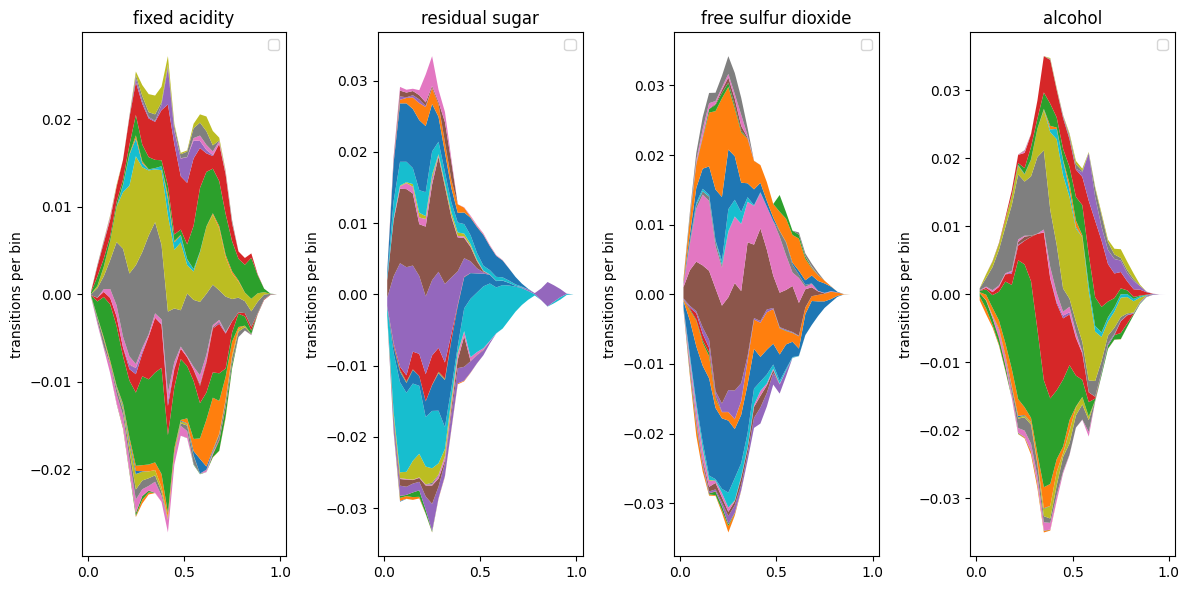

In [16]:
plot_sens_matrix_list(sample_points_min_max[0], [d[0] for d in dtc_ret], dim_labels=dim_names, line_labels=False, stack_plot_kwargs=dict(baseline="sym"), horizontal_plot=True)

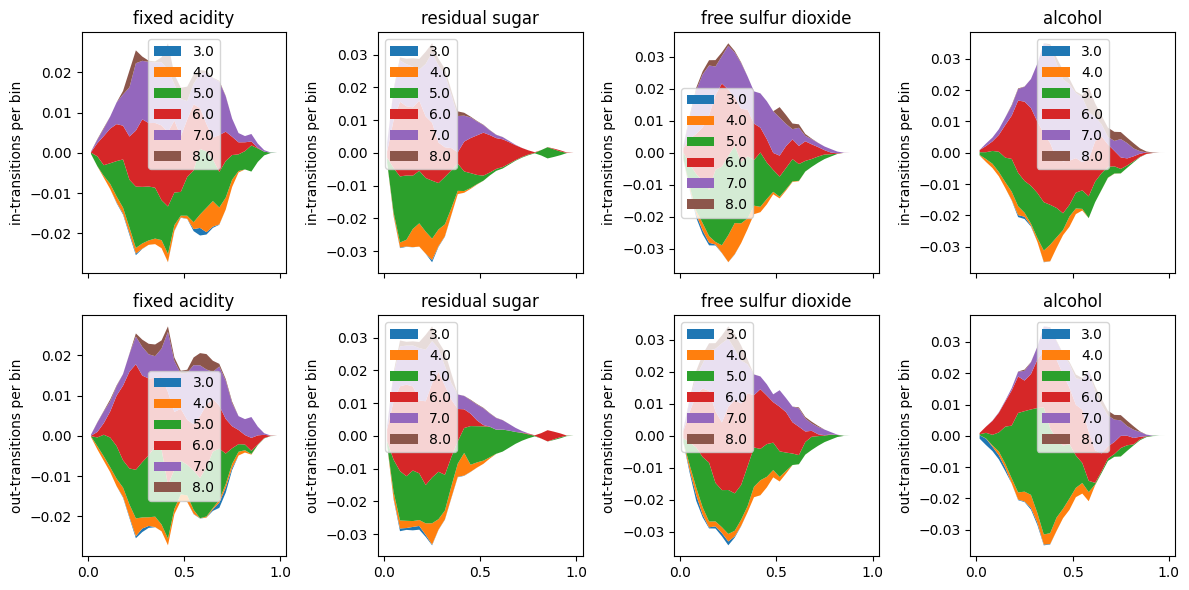

In [17]:
in_out_agg_sens_matrix_list = compute_in_out_agg_sens_matrix_list([d[0] for d in dtc_ret])
plot_aggregated_input_output_transitions(sample_points_min_max[0], in_out_agg_sens_matrix_list, stack_plot_kwargs=dict(baseline="sym"), dim_labels=dim_names, line_labels=label_names)

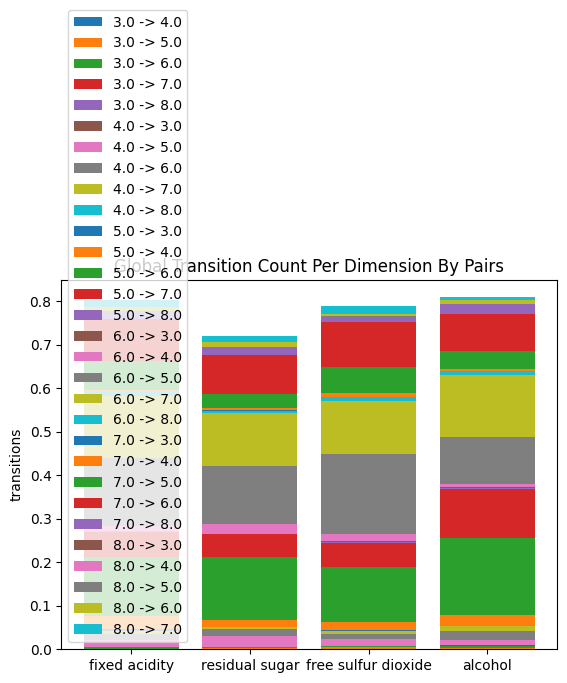

In [18]:
global_param_trans_matrix_by_pair = compute_global_param_transitions_by_pairs([d[0] for d in dtc_ret])
plot_global_param_transitions_by_pair(global_param_trans_matrix_by_pair, dim_names, label_names)

In [19]:
S_i_s, R_i_s = aggregate_directed_transition_matrix([d[0] for d in dtc_ret], [d[1] for d in dtc_ret])


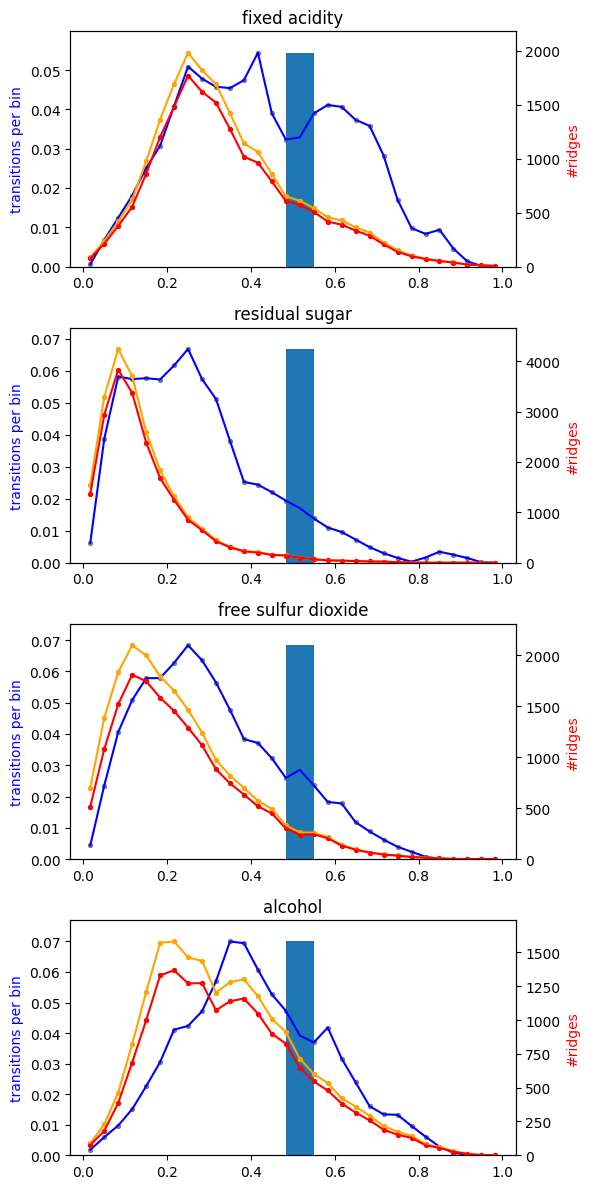

In [ ]:
plot_sensitivities(sample_points=sample_points_min_max[0], sensitivities=S_i_s, n_ridges=R_i_s, bandwidths=bandwidths,
                   dim_labels=dim_names)

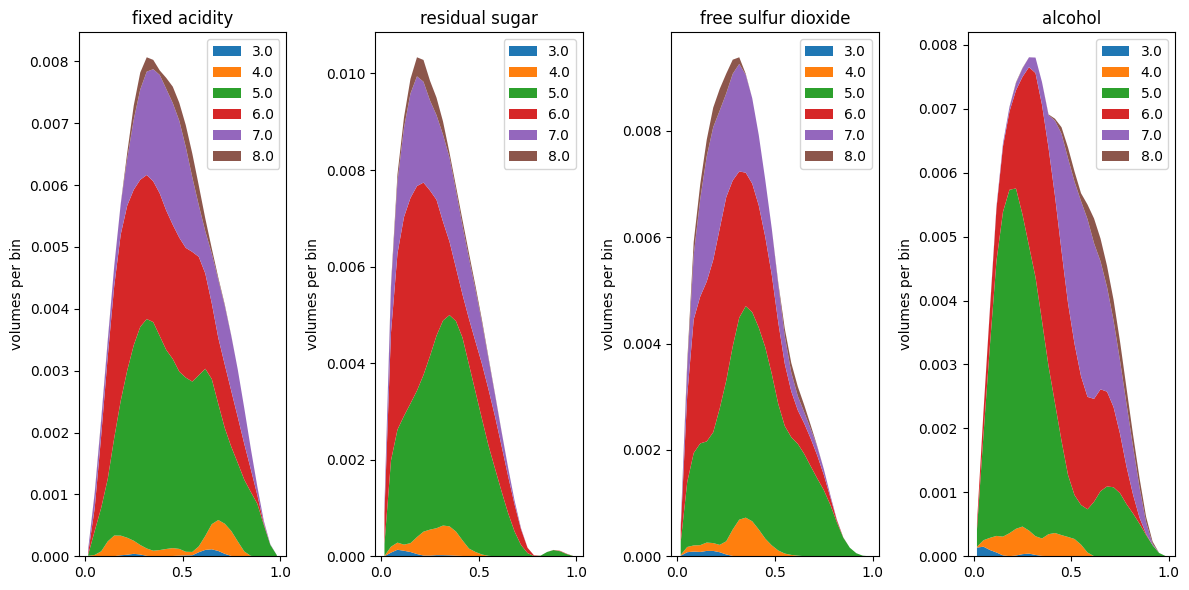

In [21]:
D_i_s, _, _, _ = compute_label_distribution(samples, labels, bandwidths, aabbox, clip_convex_hull=clip_convex_hull, vor=vor, sample_points_min_max=sample_points_min_max)

plot_label_distribution_matrix_list(sample_points_min_max[0], D_i_s, stack_plot=True, horizontal_layout=True, dim_labels=dim_names, line_labels=label_names)

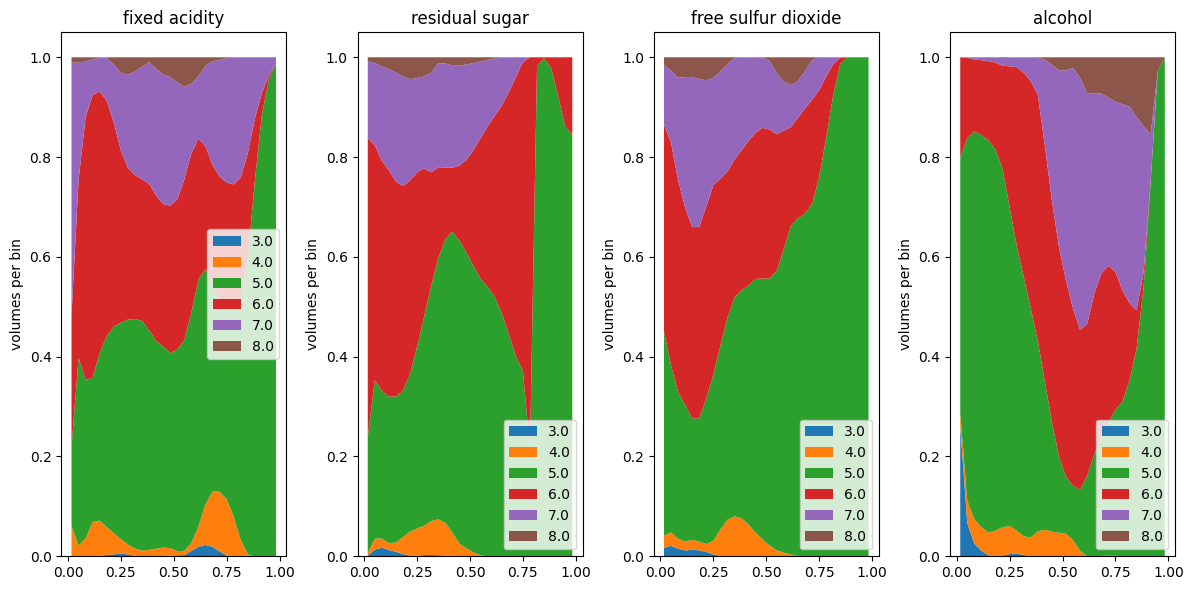

In [22]:
D_i_s_normed = normalize_label_distribution(D_i_s)
plot_label_distribution_matrix_list(sample_points_min_max[0], D_i_s_normed, stack_plot=True, horizontal_layout=True, dim_labels=dim_names, line_labels=label_names)

# Not Normalized

In [5]:
samples, labels = df_.values[:, :-1], df_.values[:, -1]
dim_names = df_.columns[:-1].to_list()
uq_label_names, uq_idx, l_inv = np.unique(labels, return_index=True, return_inverse=True)

# remap labels to np.arange
labels = l_inv

label_names = uq_label_names

In [6]:
vor = Voronoi(samples)

In [7]:
n_samples_per_dim = 30
aabbox = np.vstack([np.min(samples, 0), np.max(samples, 0)]).T
bandwidths = (aabbox[:, 1] - aabbox[:, 0]) / n_samples_per_dim
clip_convex_hull = True
verbose_geom = False

In [8]:
labels_c = np.array(plt.color_sequences.get("tab10"))[labels]

In [9]:
ridge_vertices, ridge_point_indices = generate_geometric_segment_boundaries_via_voronoi(samples, labels, aabbox, clip_convex_hull=clip_convex_hull, vor=vor, return_original_ridge_point_indices=True, verbose=verbose_geom)

if samples.shape[1] <= 3:
    plot_ridges(ridge_vertices, samples, labels, aabbox, clip_convex_hull)

c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro.py:292: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 1, 'A', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  d_ = point @ eq[:-1] + eq[-1]
c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro.py:331: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 1, 'C', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  d = np.dot(points[i], ridge_halfspace_definition[:-1]) + ridge_halfspace_definition[-1]


In [10]:
M_T = build_directed_ridge_vertices_selector_matrix(samples, labels, ridge_point_indices)

In [11]:
sample_points_min_max, dtc_ret = build_directed_transition_cubes(M_T, ridge_vertices, bandwidths=bandwidths, clip_box=aabbox, verbose=False, n_proc=-1)

c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro_plots.py:339: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


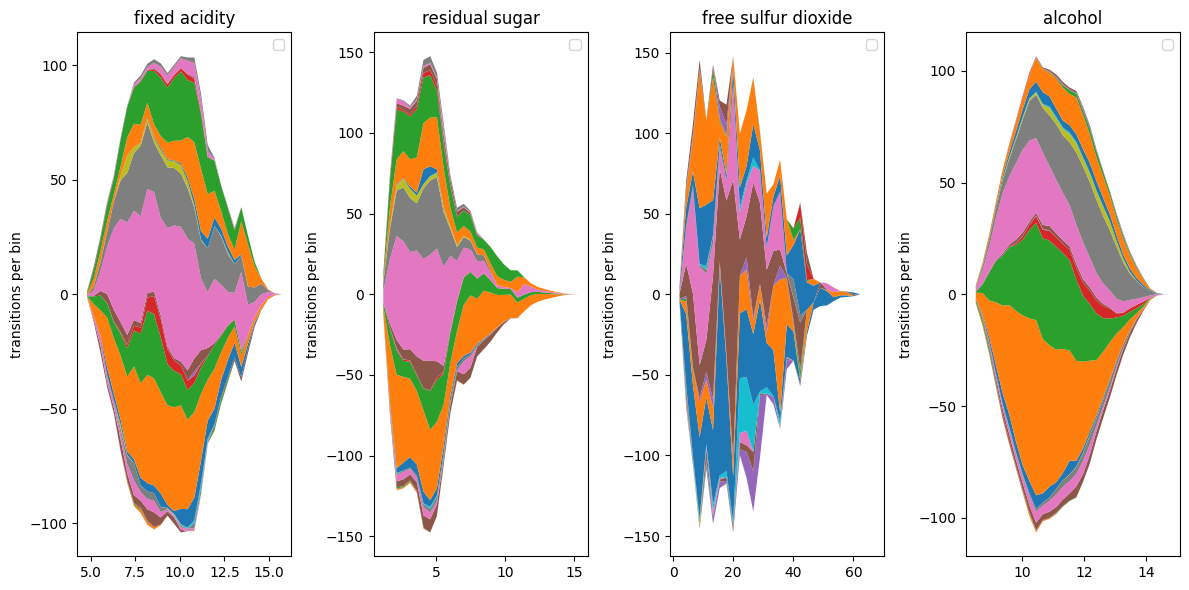

In [12]:
plot_sens_matrix_list(sample_points_min_max[0], [d[0] for d in dtc_ret], dim_labels=dim_names, line_labels=False, stack_plot_kwargs=dict(baseline="sym"), horizontal_plot=True)

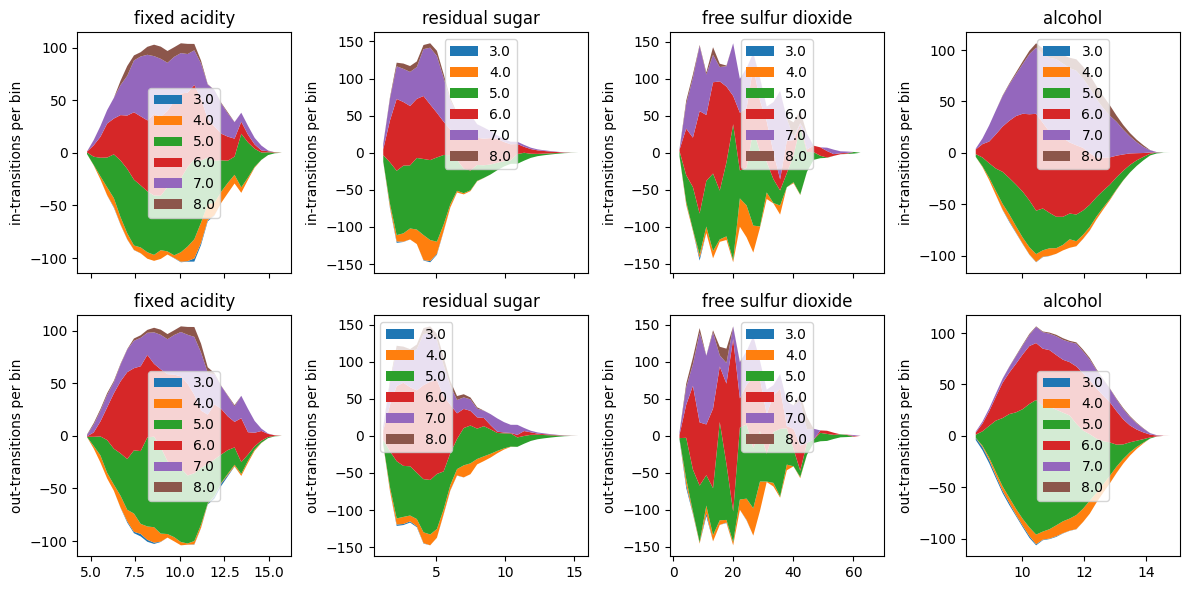

In [15]:
in_out_agg_sens_matrix_list = compute_in_out_agg_sens_matrix_list([d[0] for d in dtc_ret])
plot_aggregated_input_output_transitions(sample_points_min_max[0], in_out_agg_sens_matrix_list, stack_plot_kwargs=dict(baseline="sym"), dim_labels=dim_names, line_labels=label_names)

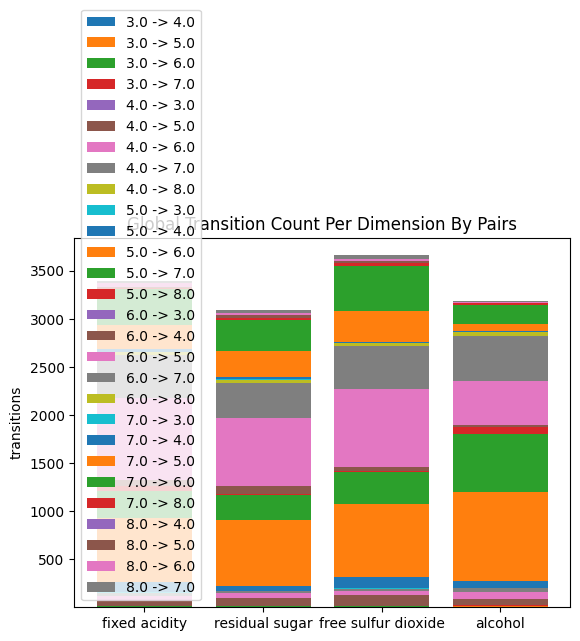

In [16]:
global_param_trans_matrix_by_pair = compute_global_param_transitions_by_pairs([d[0] for d in dtc_ret])
plot_global_param_transitions_by_pair(global_param_trans_matrix_by_pair, dim_names, label_names)

In [17]:
S_i_s, R_i_s = aggregate_directed_transition_matrix([d[0] for d in dtc_ret], [d[1] for d in dtc_ret])

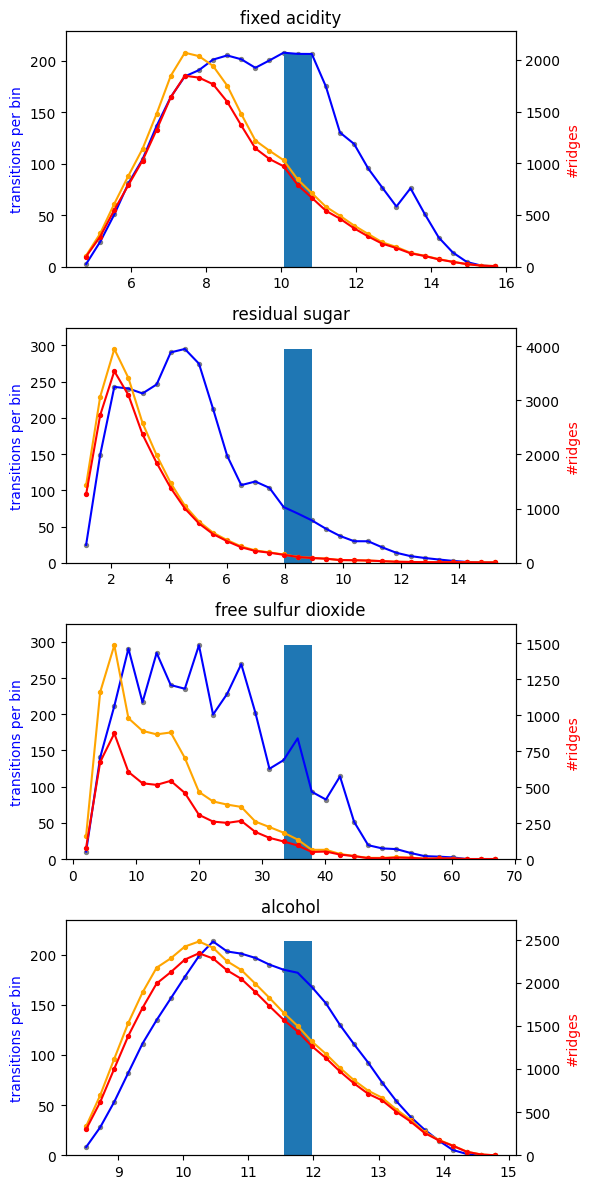

In [ ]:
plot_sensitivities(sample_points=sample_points_min_max[0], sensitivities=S_i_s, n_ridges=R_i_s, bandwidths=bandwidths,
                   dim_labels=dim_names)

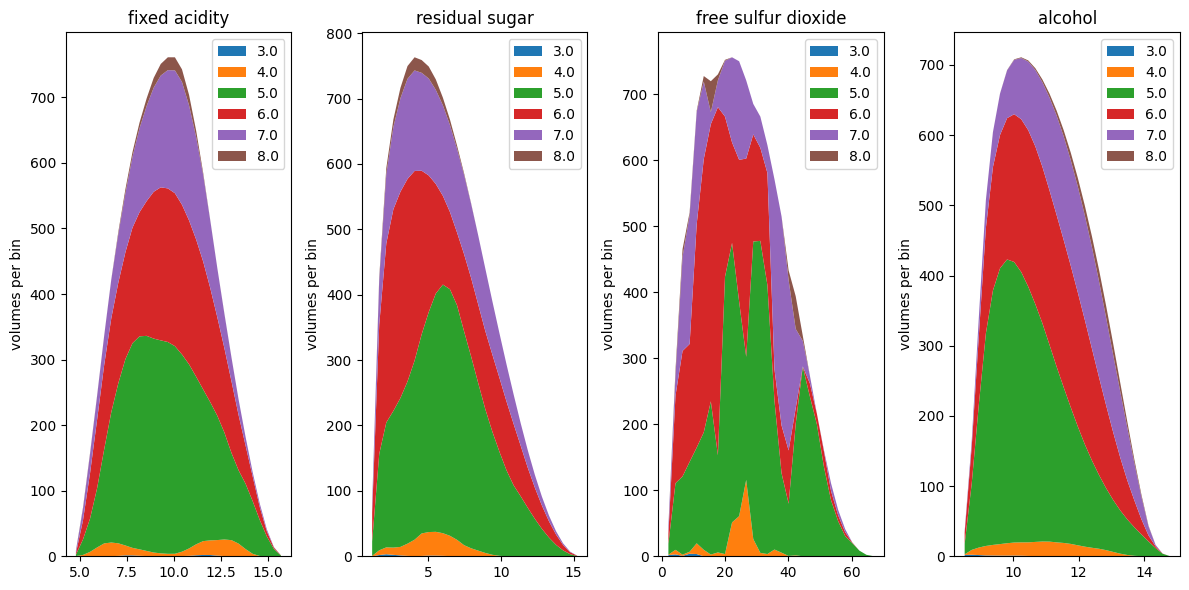

In [ ]:
D_i_s, _, _, _ = compute_label_distribution(samples, labels, bandwidths, aabbox, clip_convex_hull=clip_convex_hull, vor=vor, sample_points_min_max=sample_points_min_max)
plot_label_distribution_matrix_list(sample_points_min_max[0], D_i_s, stack_plot=True, horizontal_layout=True, dim_labels=dim_names, line_labels=label_names)

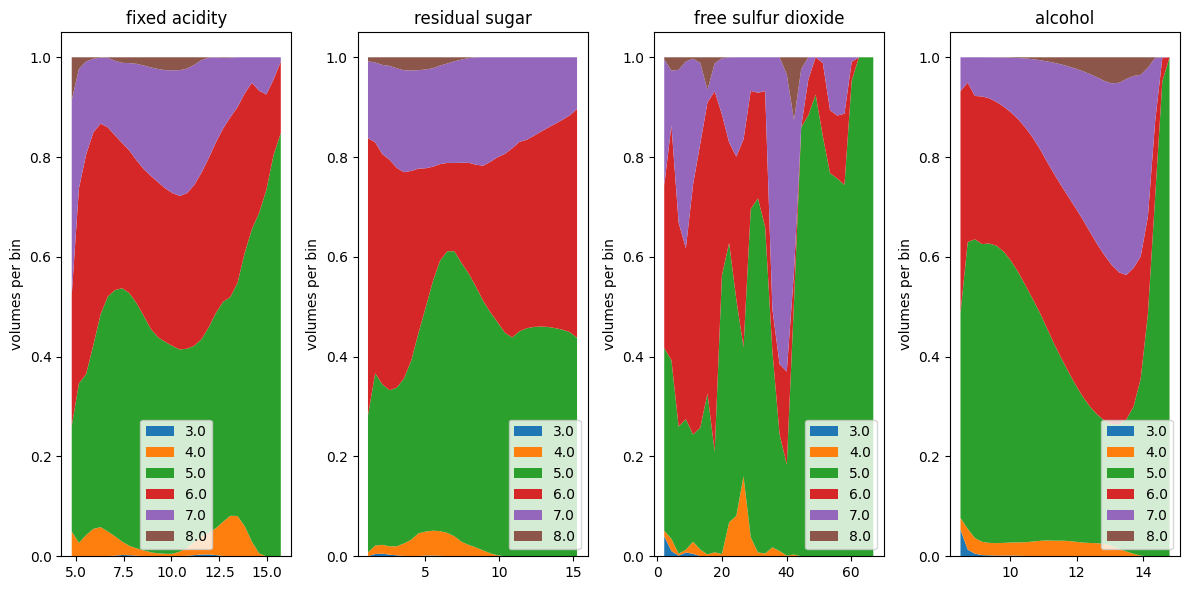

In [14]:
D_i_s_normed = normalize_label_distribution(D_i_s)
plot_label_distribution_matrix_list(sample_points_min_max[0], D_i_s_normed, stack_plot=True, horizontal_layout=True, dim_labels=dim_names, line_labels=label_names)

# Other Features

In [ ]:
from src.para_voro_convenience import *

In [36]:
df.columns.to_list()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [39]:
features_and_label = ["chlorides", "density", "alcohol", "quality"]

c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro_plots.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2], c=colors, cmap='winter', s=5)


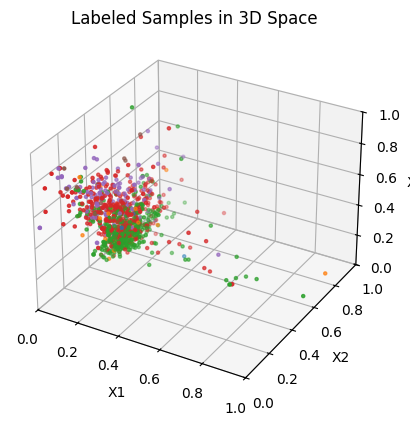

[[0. 0. 0.]
 [0. 1. 0.]
 [1. 1. 0.]
 [1. 0. 0.]]


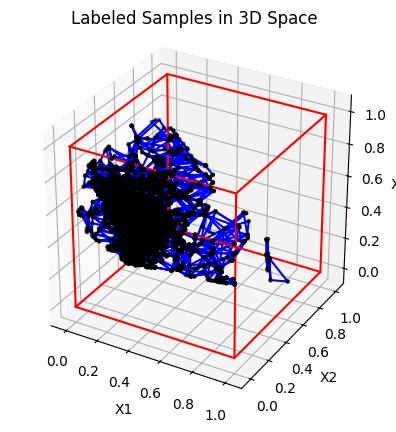

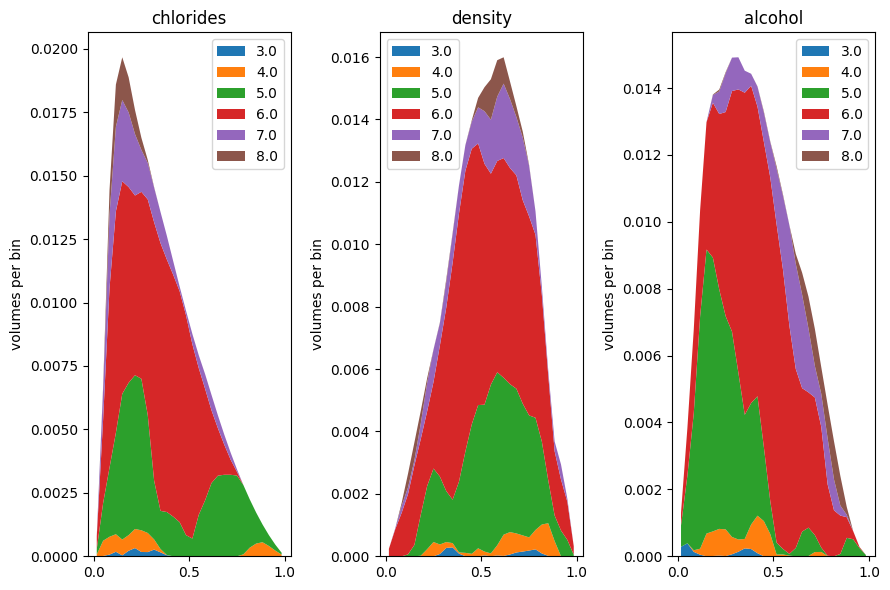

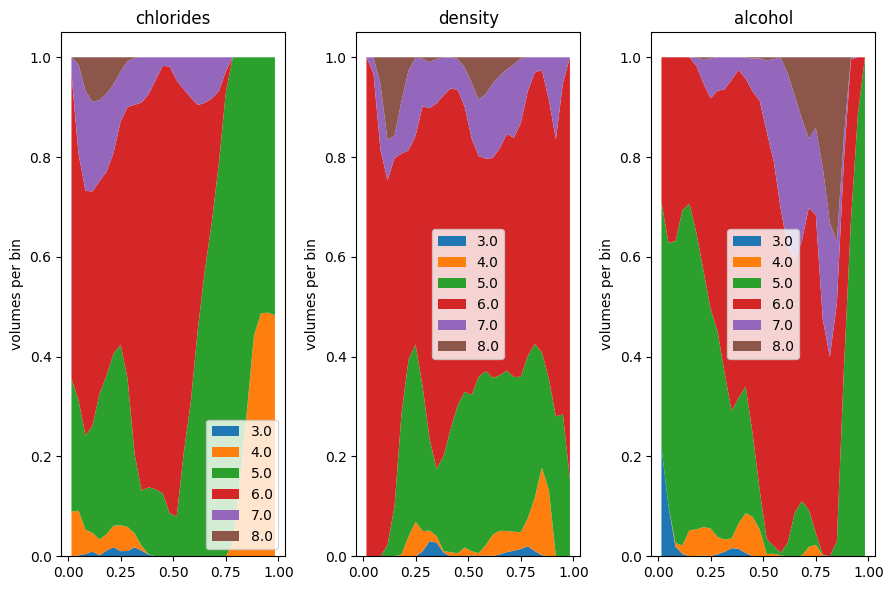

c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro_plots.py:339: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


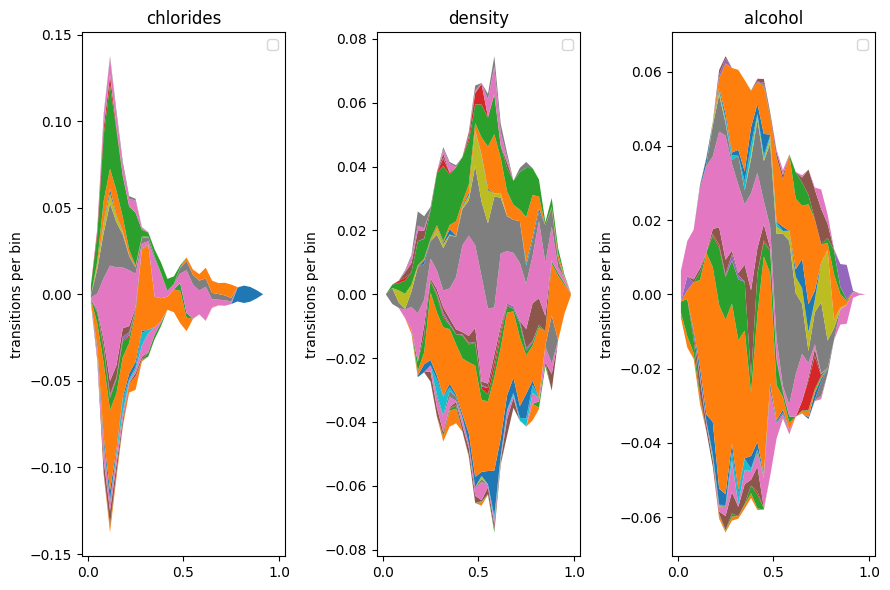

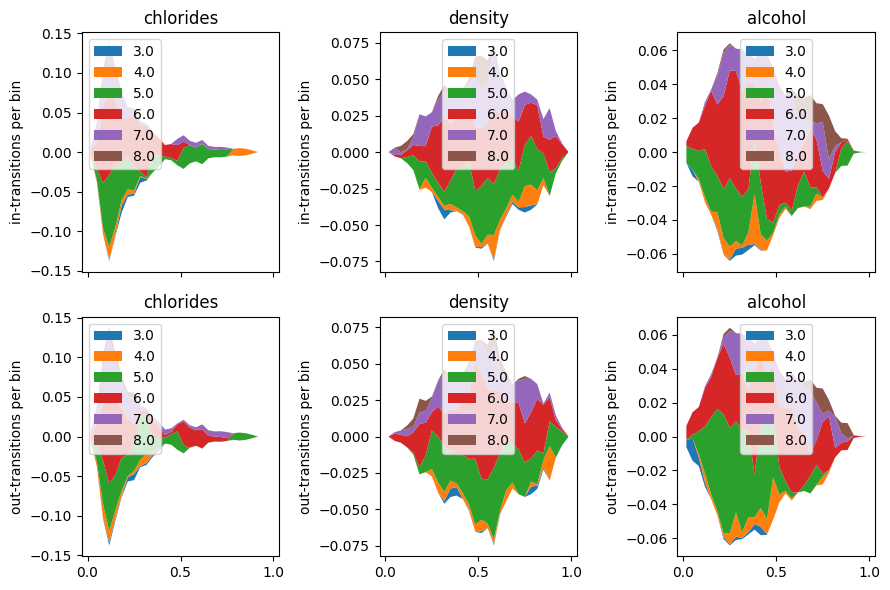

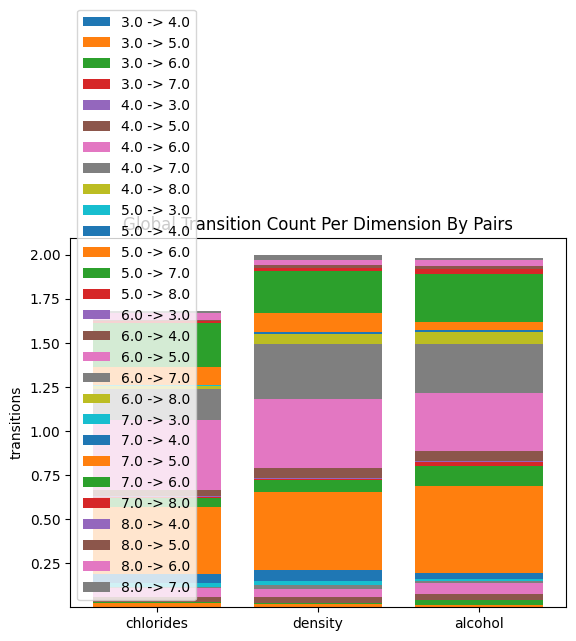

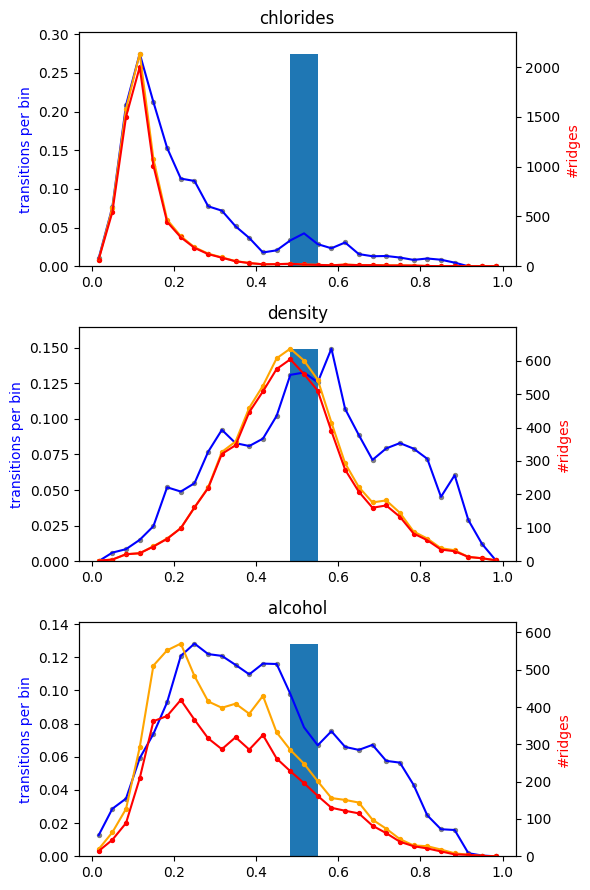

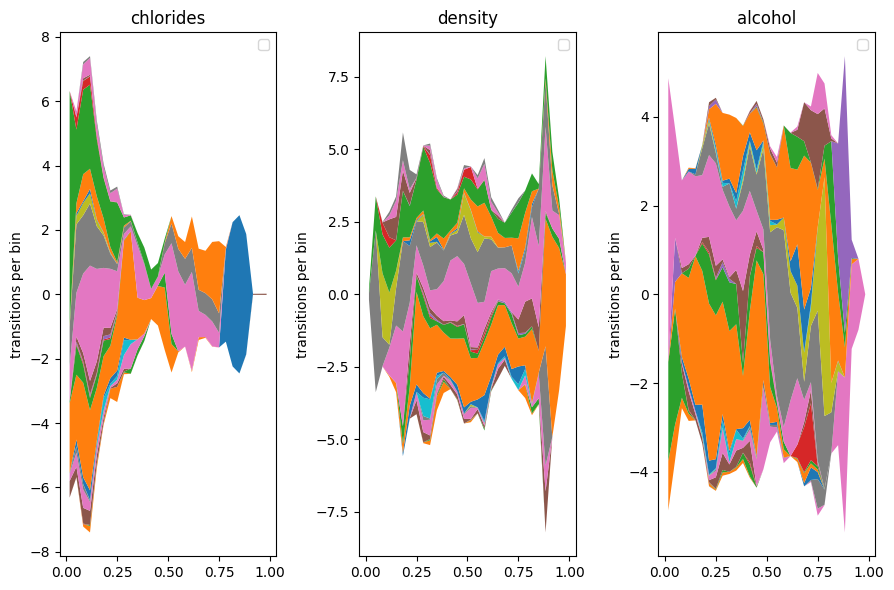

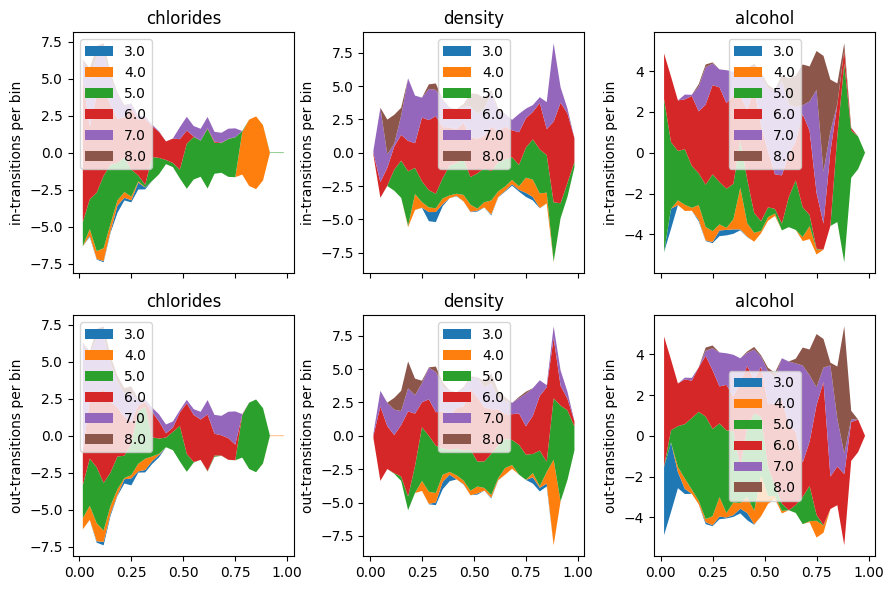

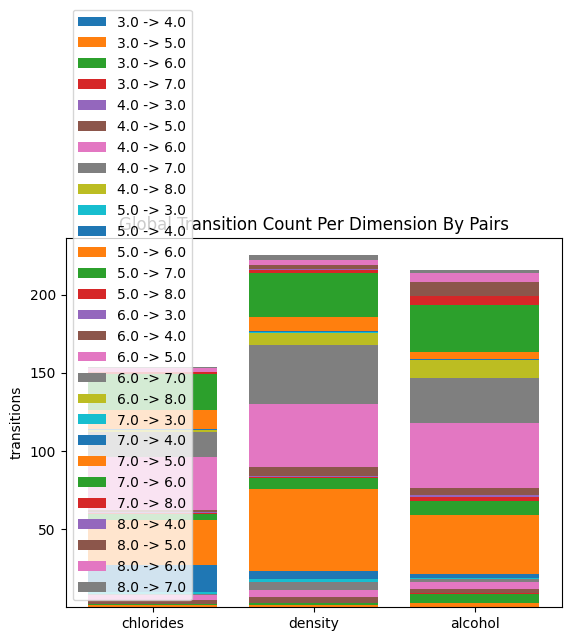

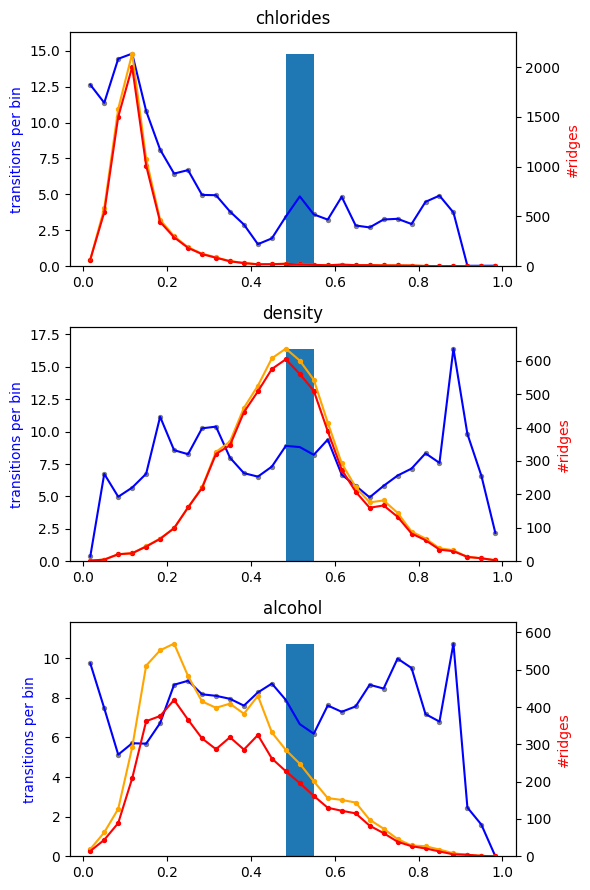

In [40]:
compute_and_plot_para_voro(df[features_and_label], normalize_samples=True, n_samples_per_dim=30, clip_convex_hull=True)

c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro_plots.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2], c=colors, cmap='winter', s=5)


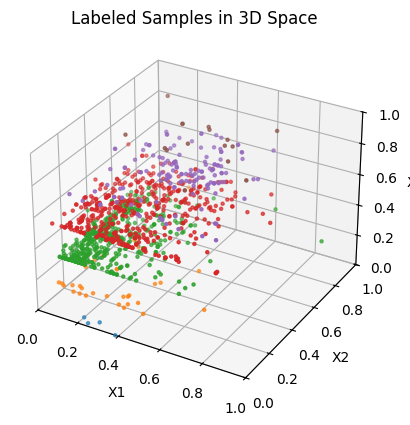

[[0. 0. 0.]
 [0. 1. 0.]
 [1. 1. 0.]
 [1. 0. 0.]]


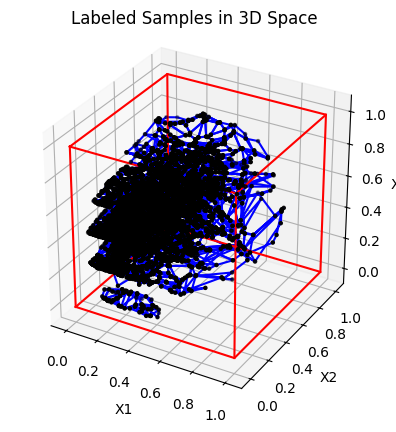

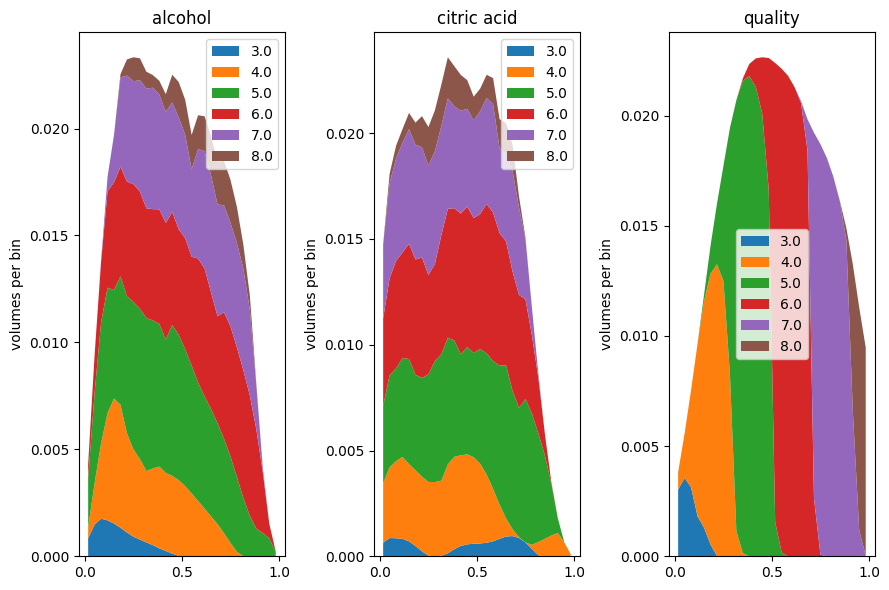

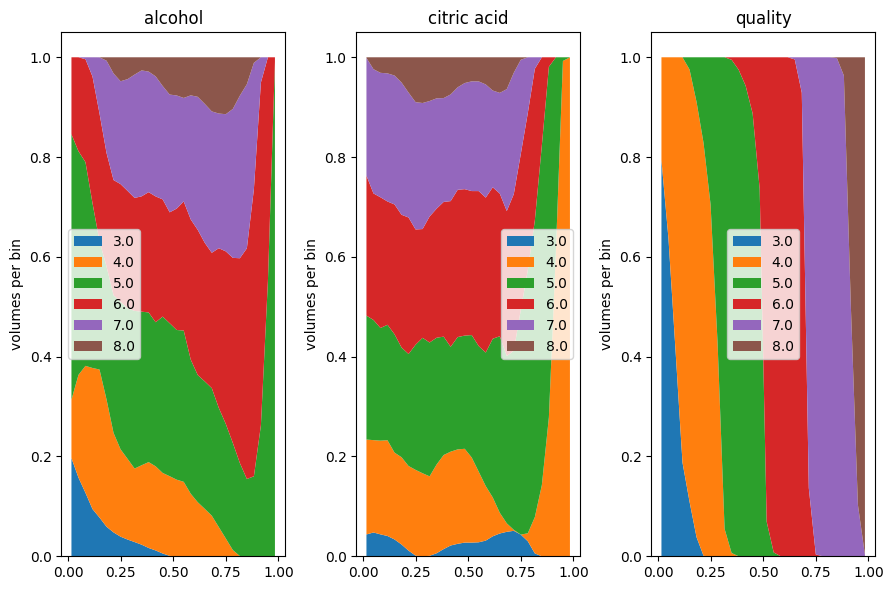

c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro_plots.py:339: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


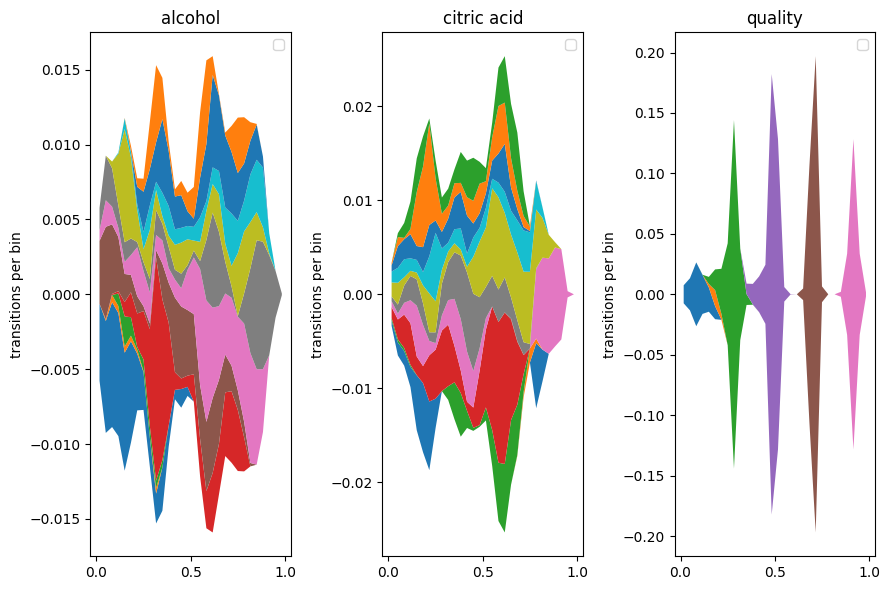

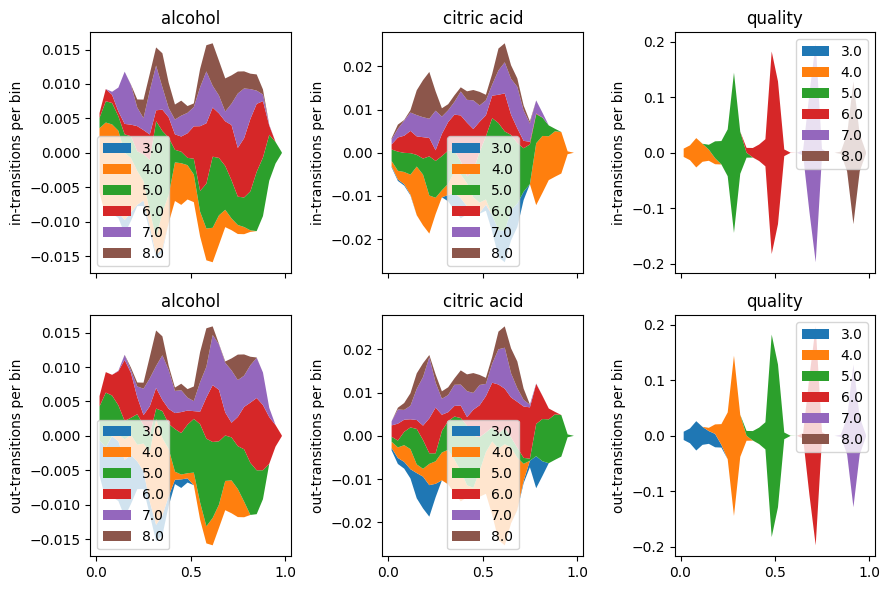

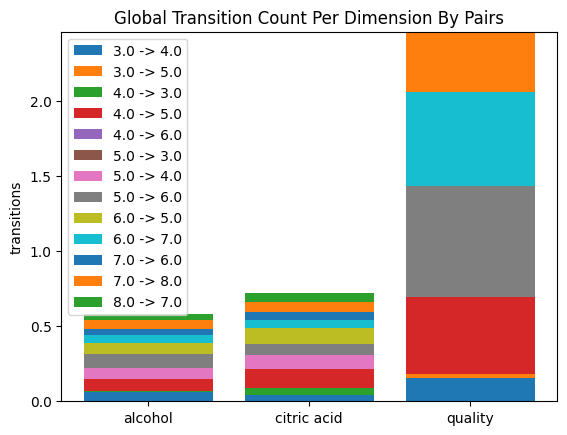

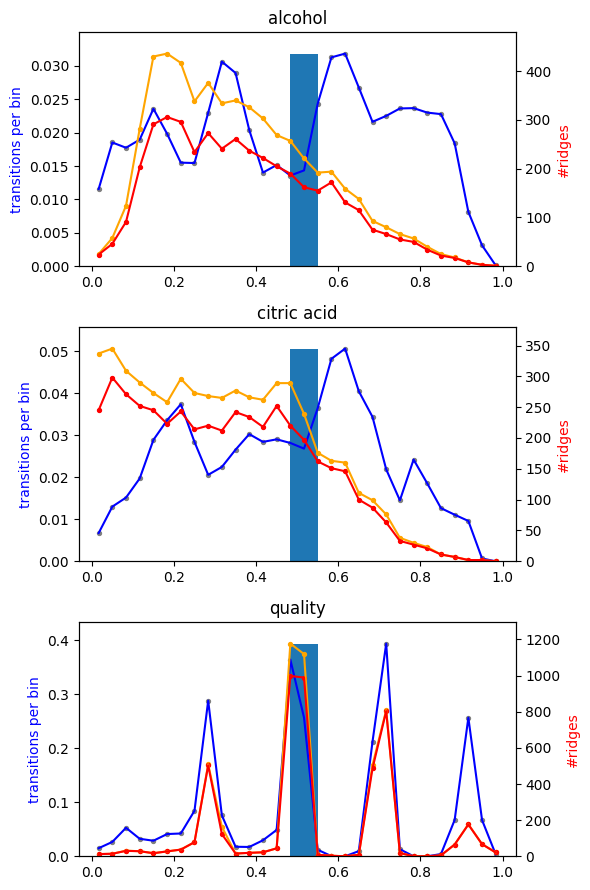

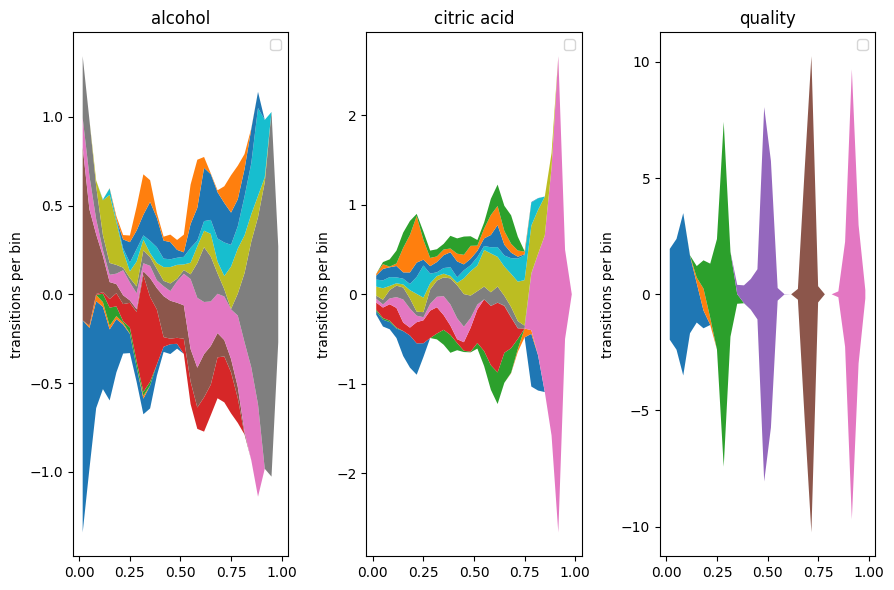

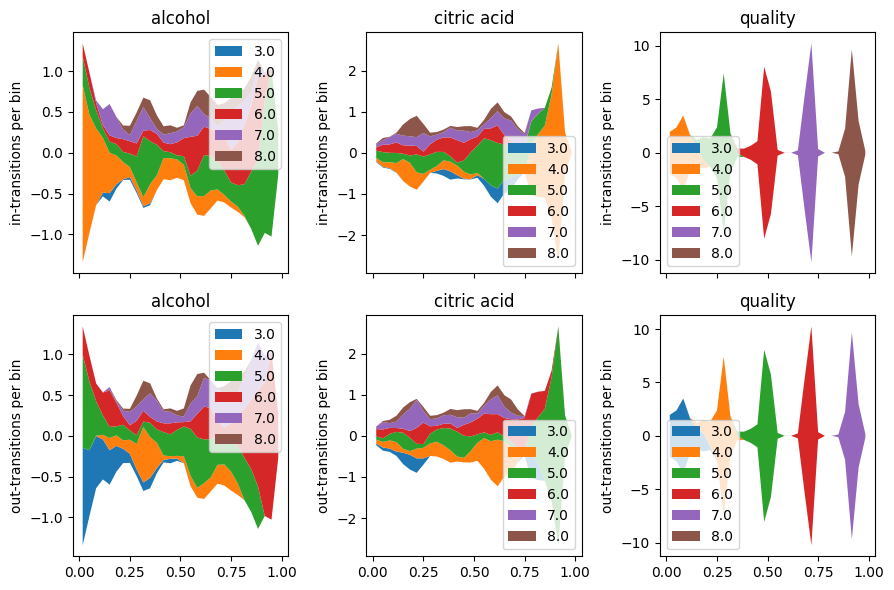

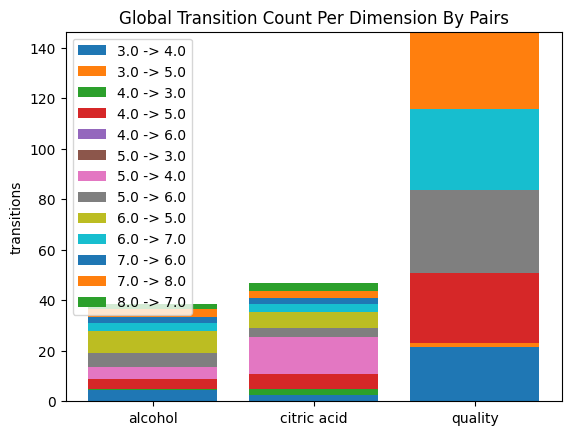

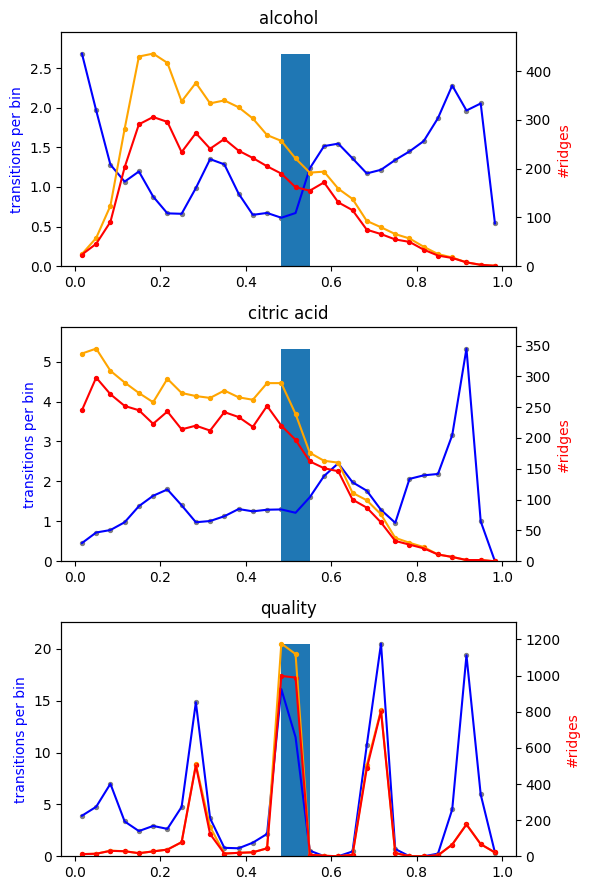

In [41]:
compute_and_plot_para_voro(df[["alcohol", "citric acid", "quality", "quality"]], normalize_samples=True, n_samples_per_dim=30, clip_convex_hull=True)

c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro_plots.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2], c=colors, cmap='winter', s=5)


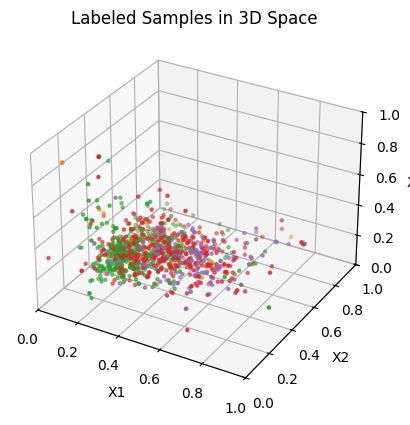

[[0. 0. 0.]
 [0. 1. 0.]
 [1. 1. 0.]
 [1. 0. 0.]]


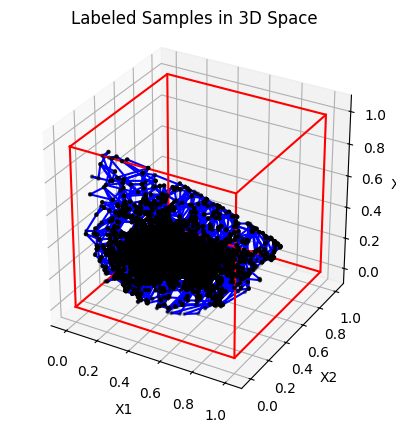

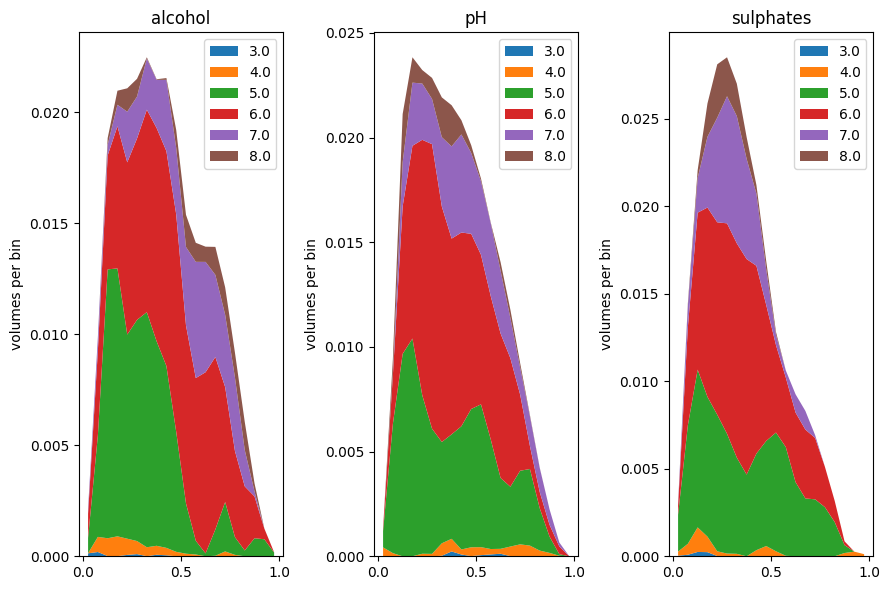

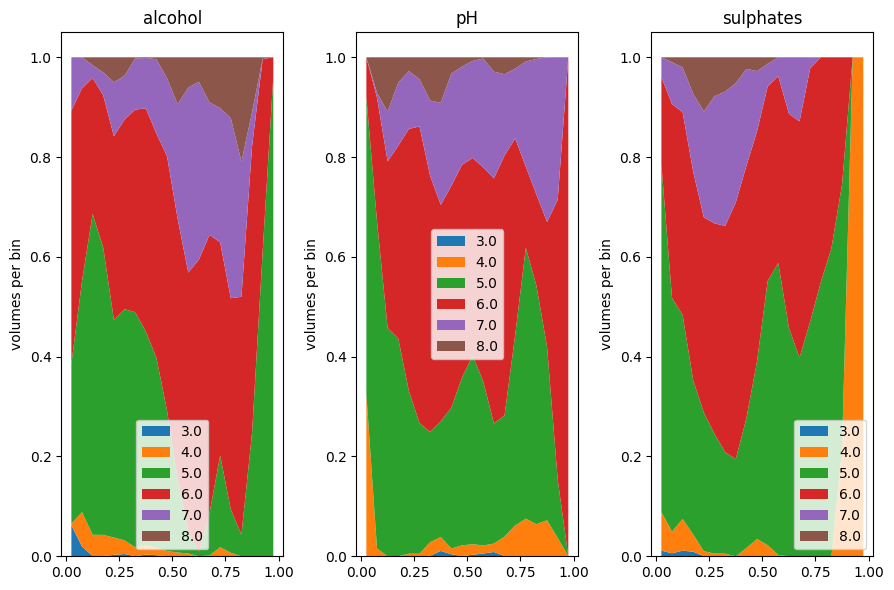

c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro_plots.py:339: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


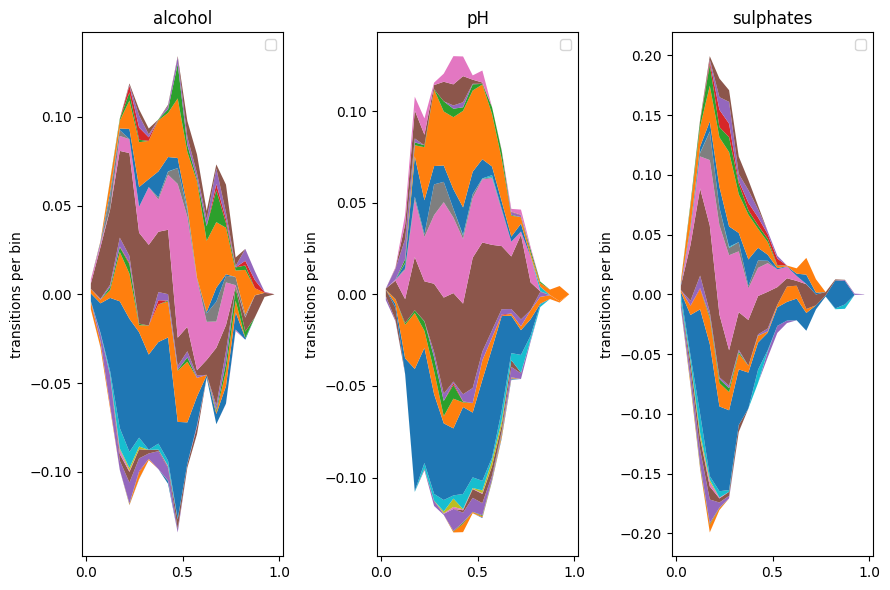

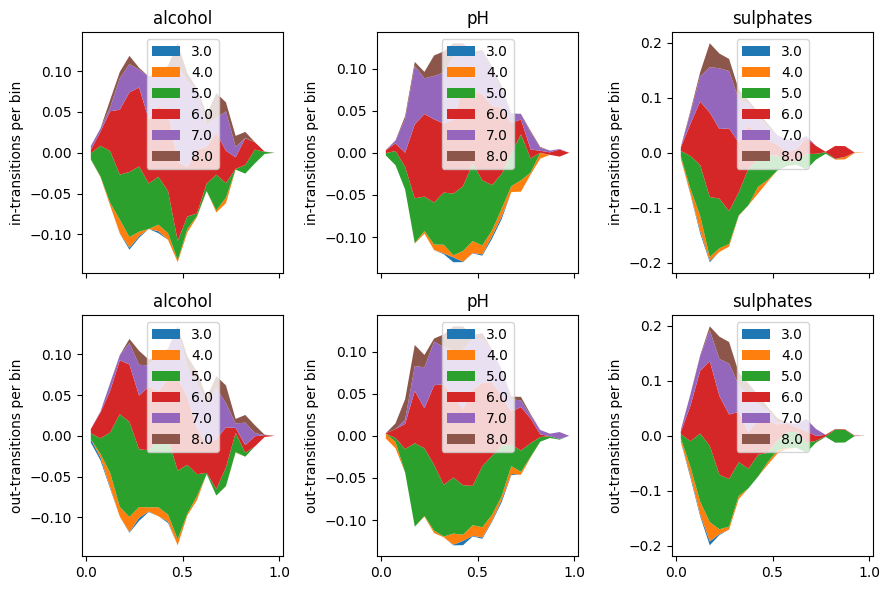

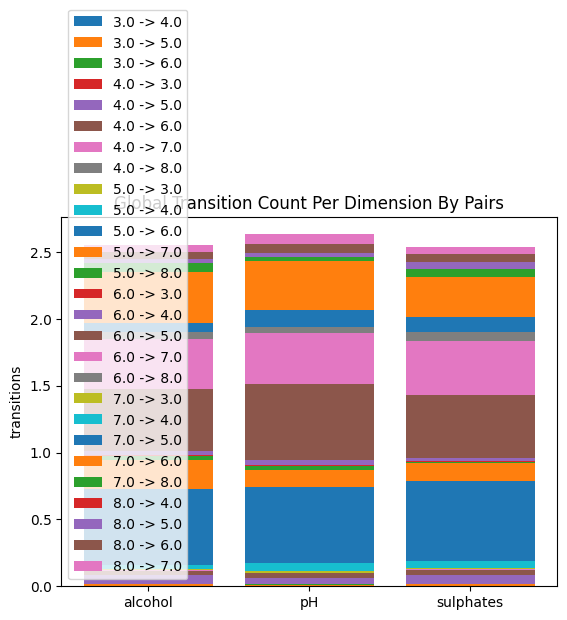

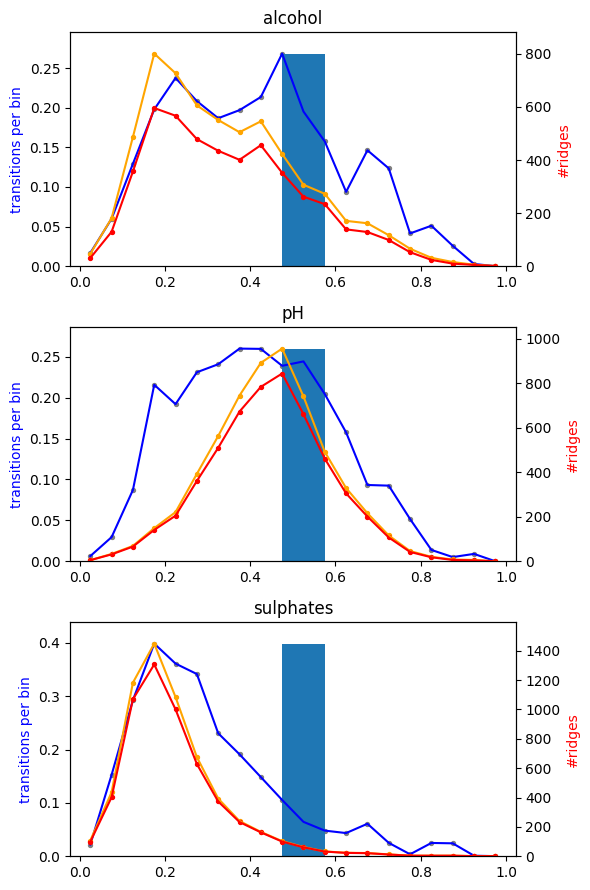

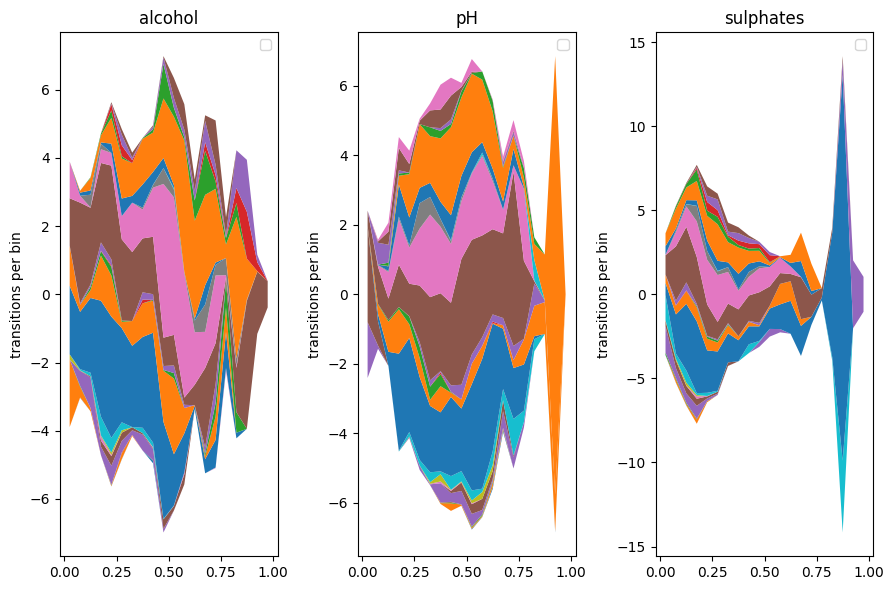

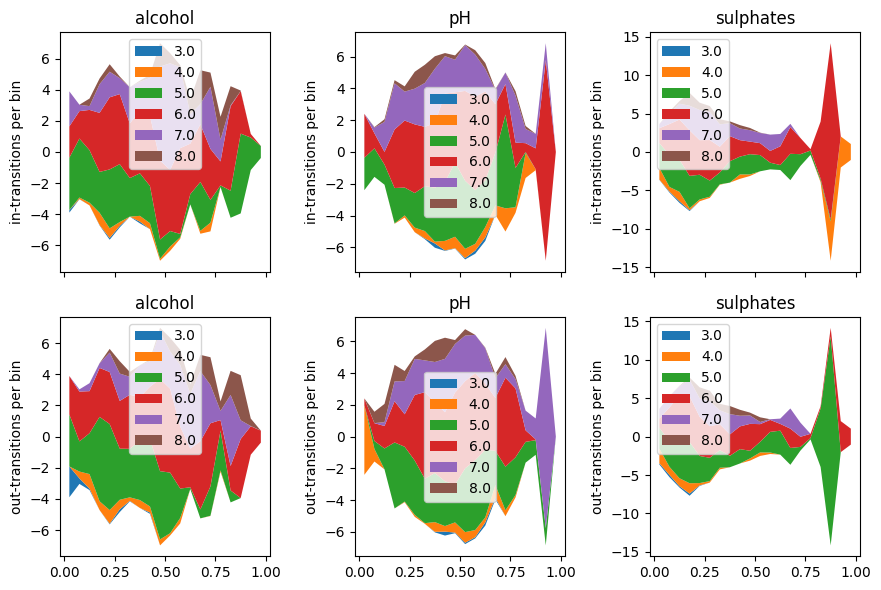

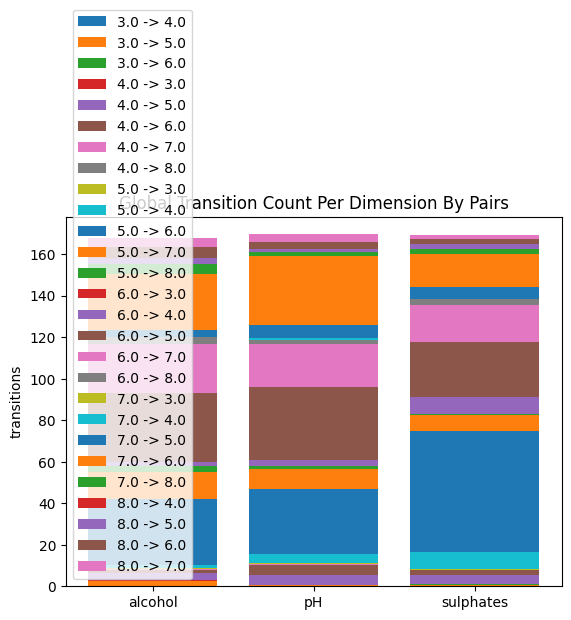

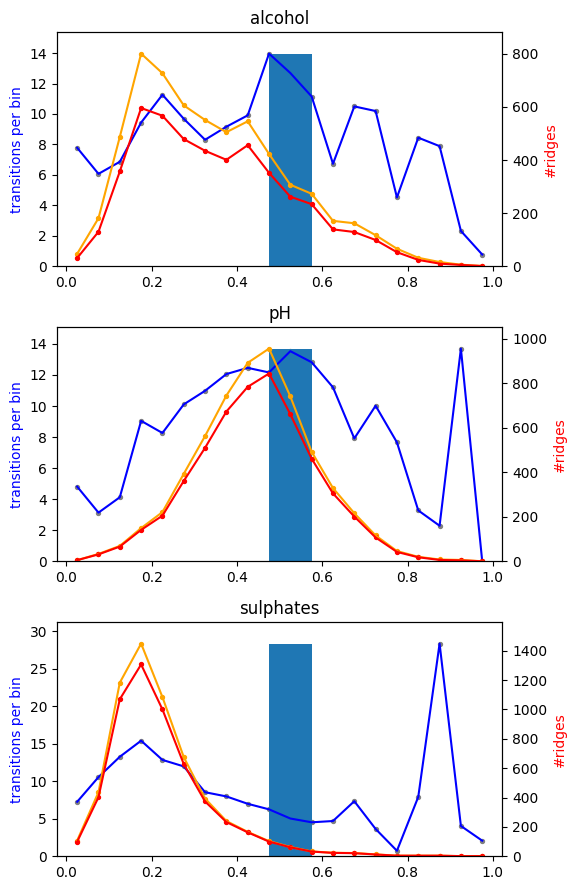

In [42]:
compute_and_plot_para_voro(df[["alcohol", "pH", "sulphates", "quality"]], normalize_samples=True, n_samples_per_dim=20, clip_convex_hull=True)

c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro_plots.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2], c=colors, cmap='winter', s=5)


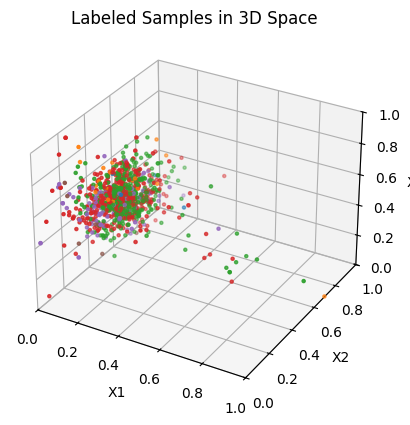

[[0. 0. 0.]
 [0. 1. 0.]
 [1. 1. 0.]
 [1. 0. 0.]]


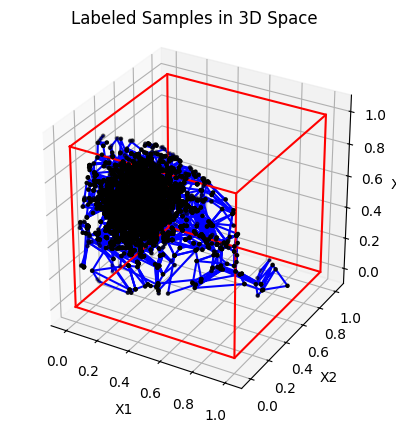

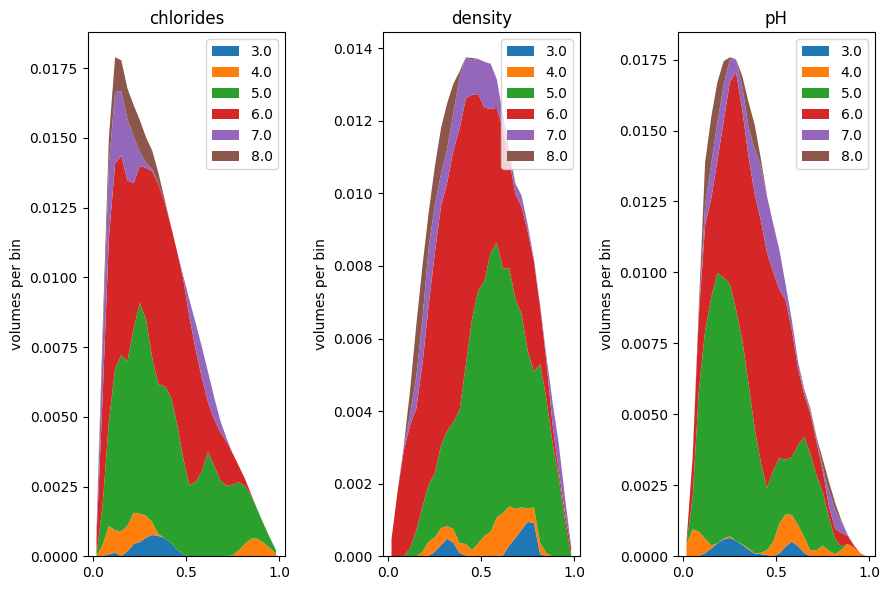

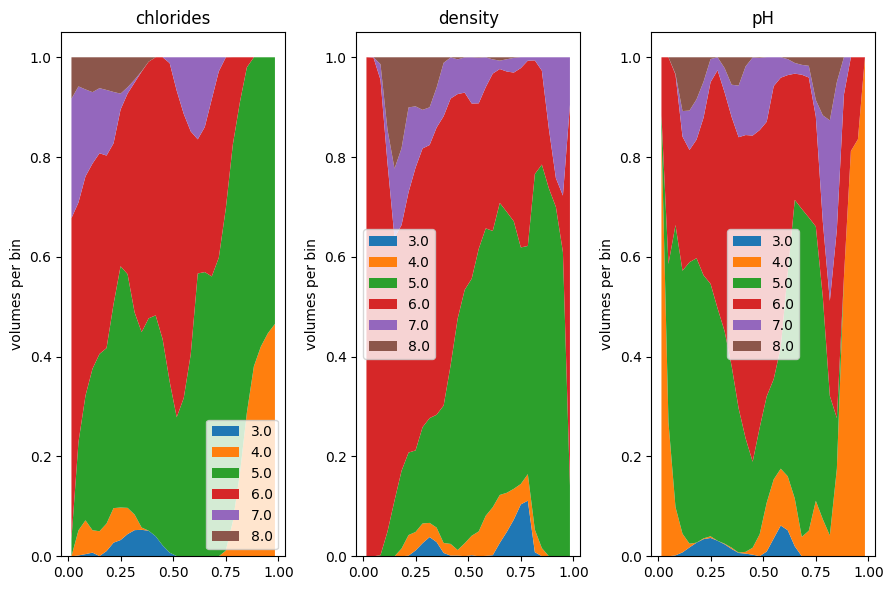

c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro_plots.py:339: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


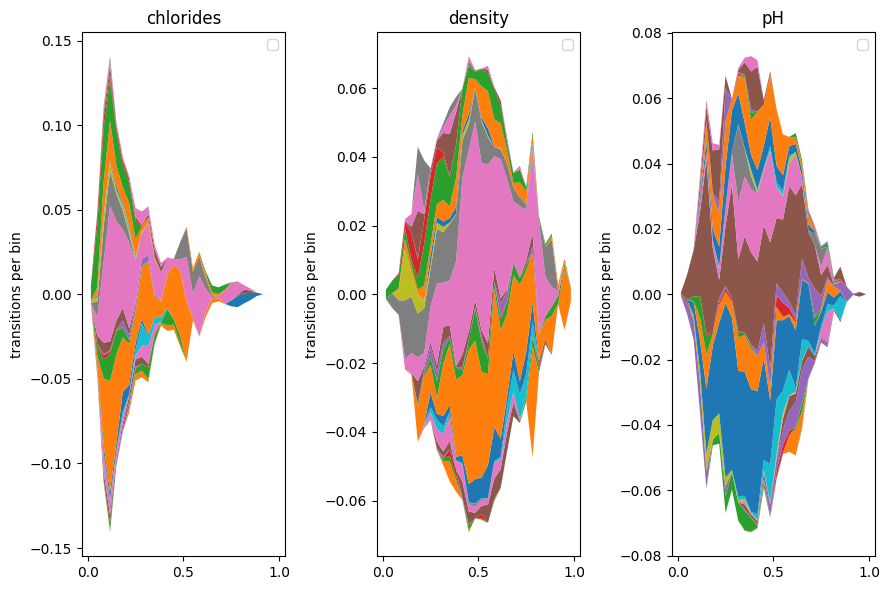

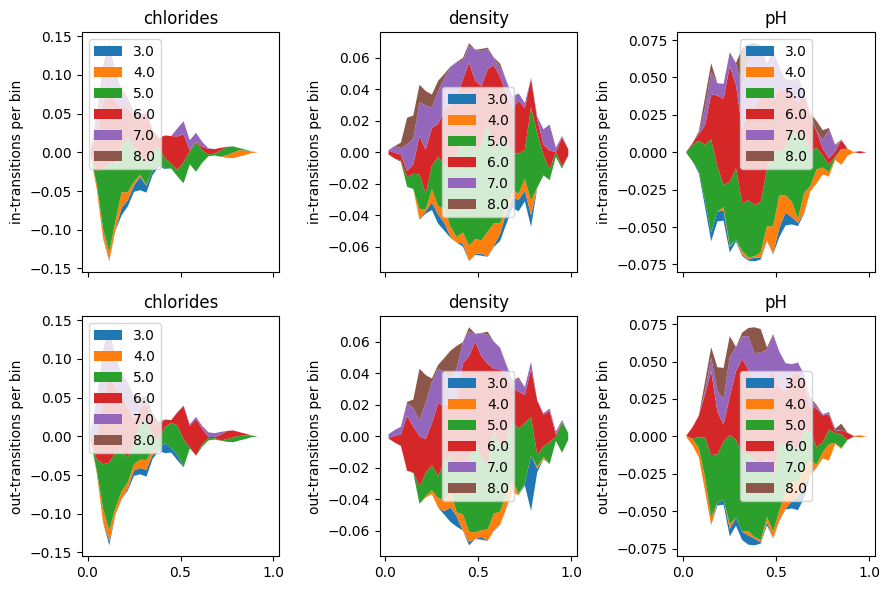

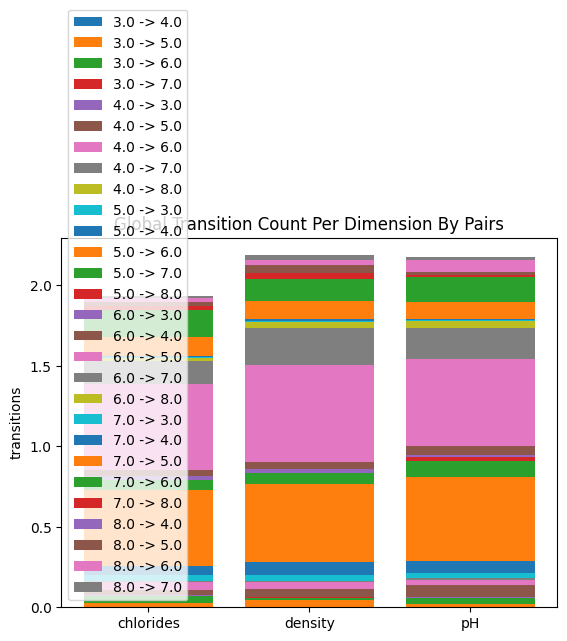

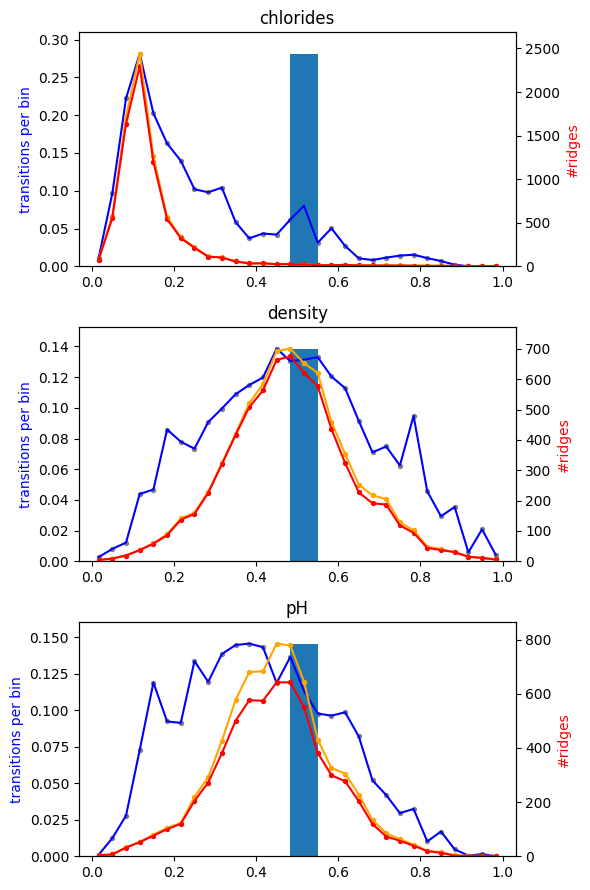

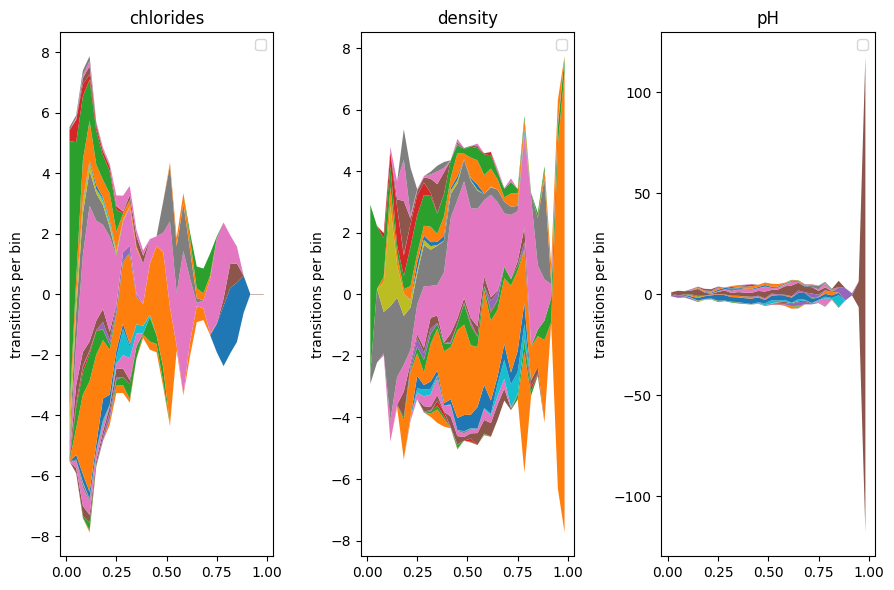

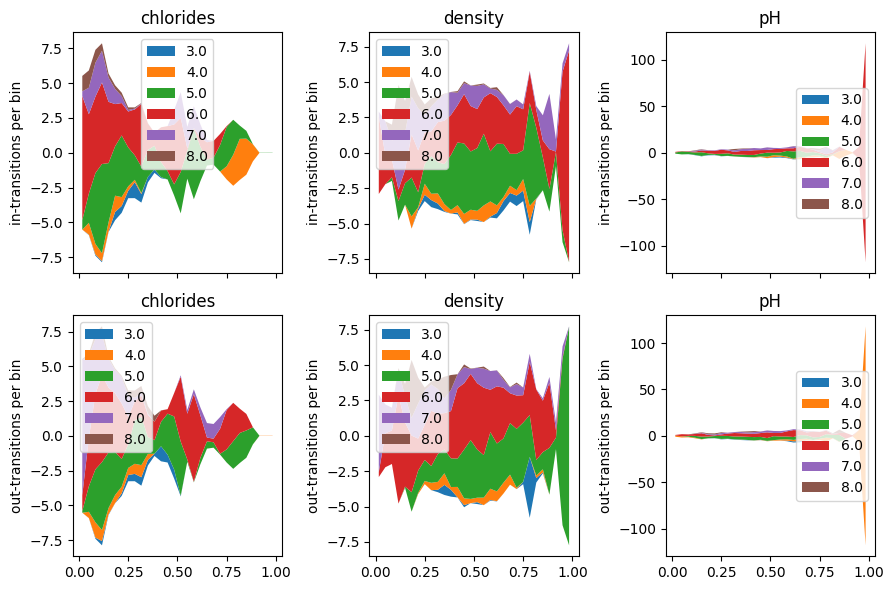

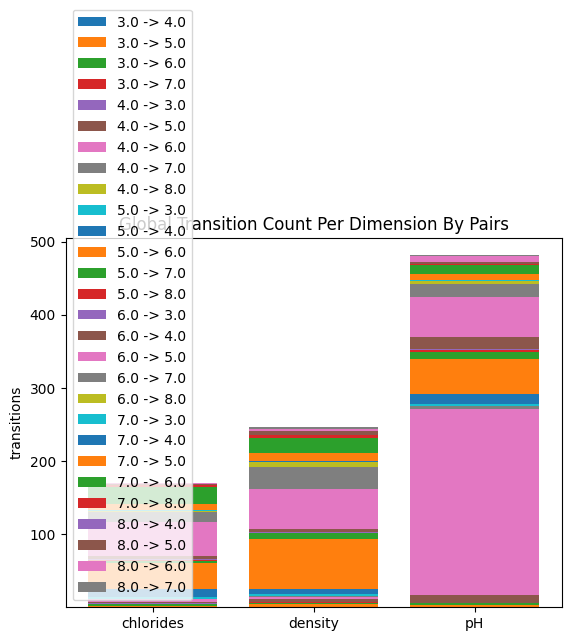

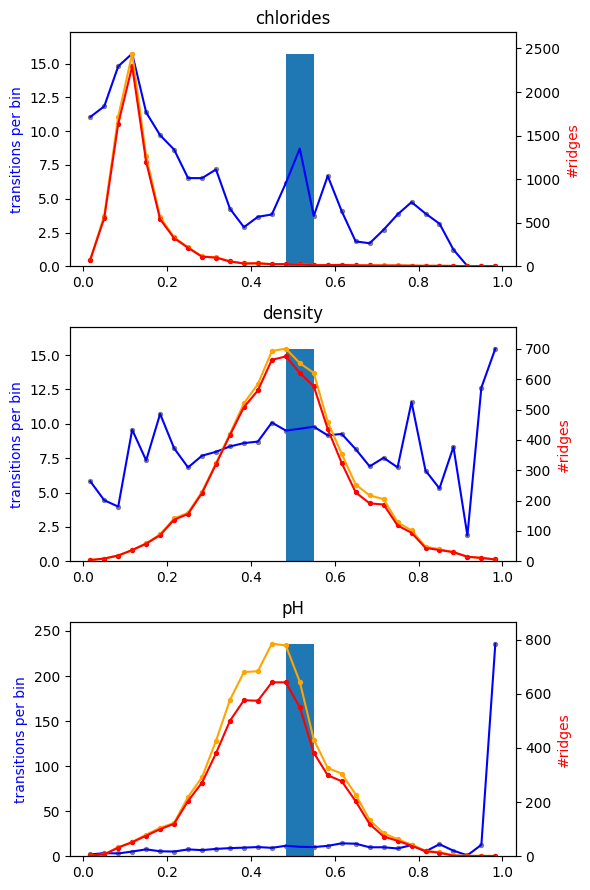

In [44]:
compute_and_plot_para_voro(df[["chlorides", "density", "pH", "quality"]], normalize_samples=True, n_samples_per_dim=30, clip_convex_hull=True)

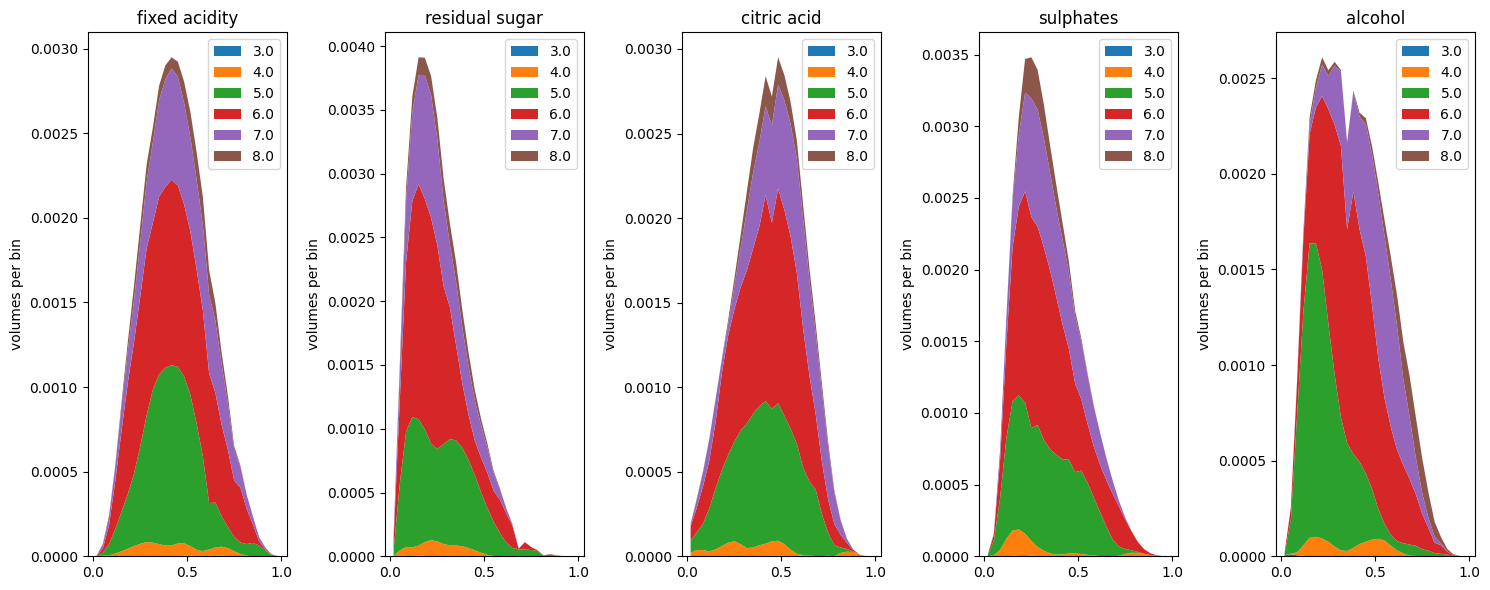

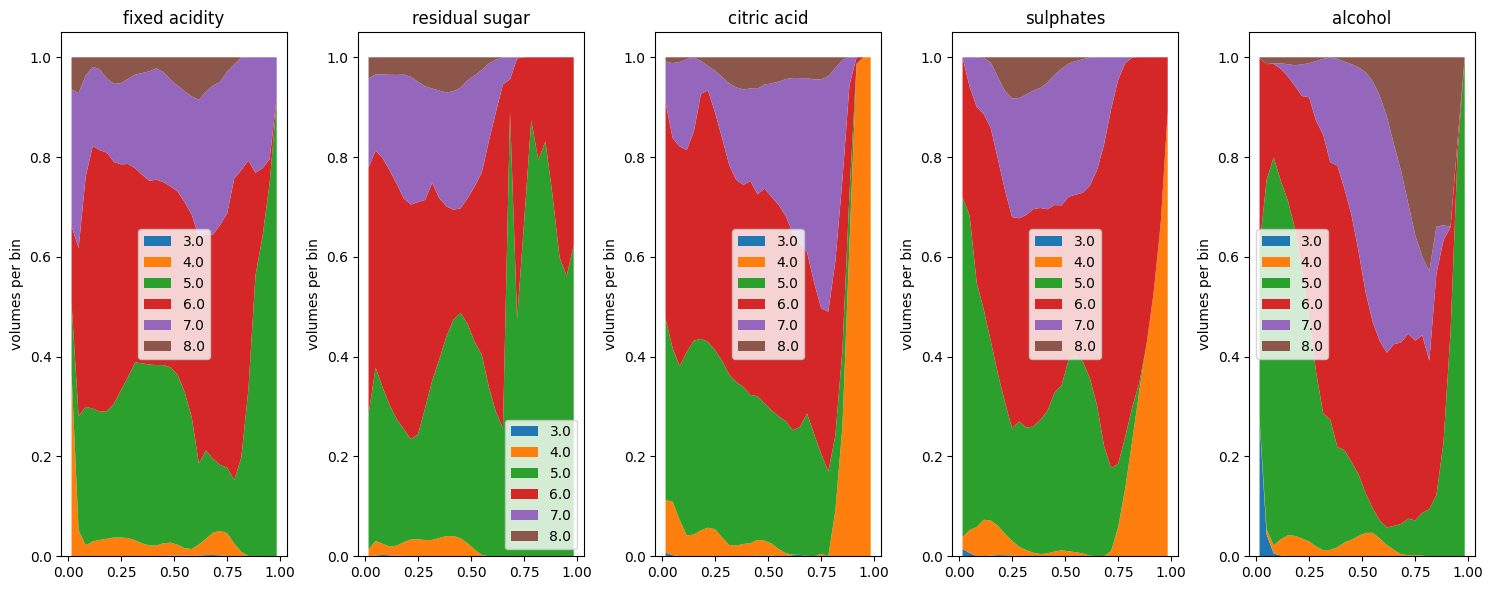

c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro_plots.py:339: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


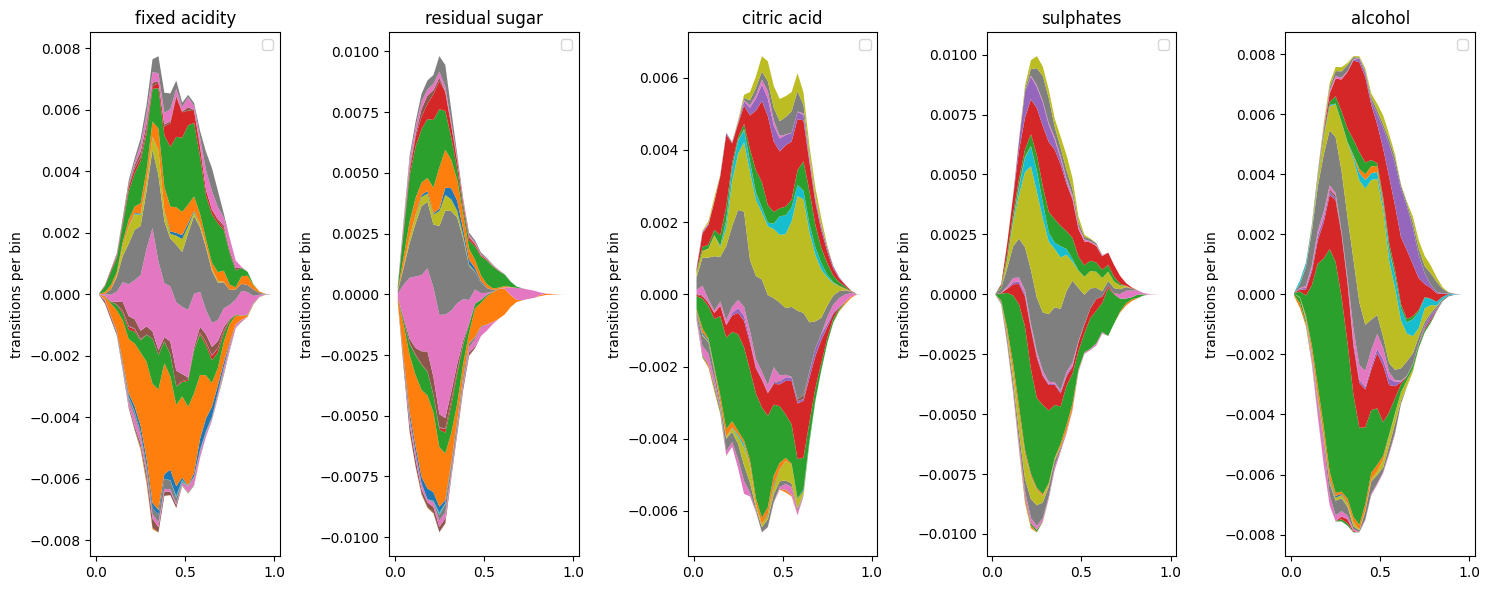

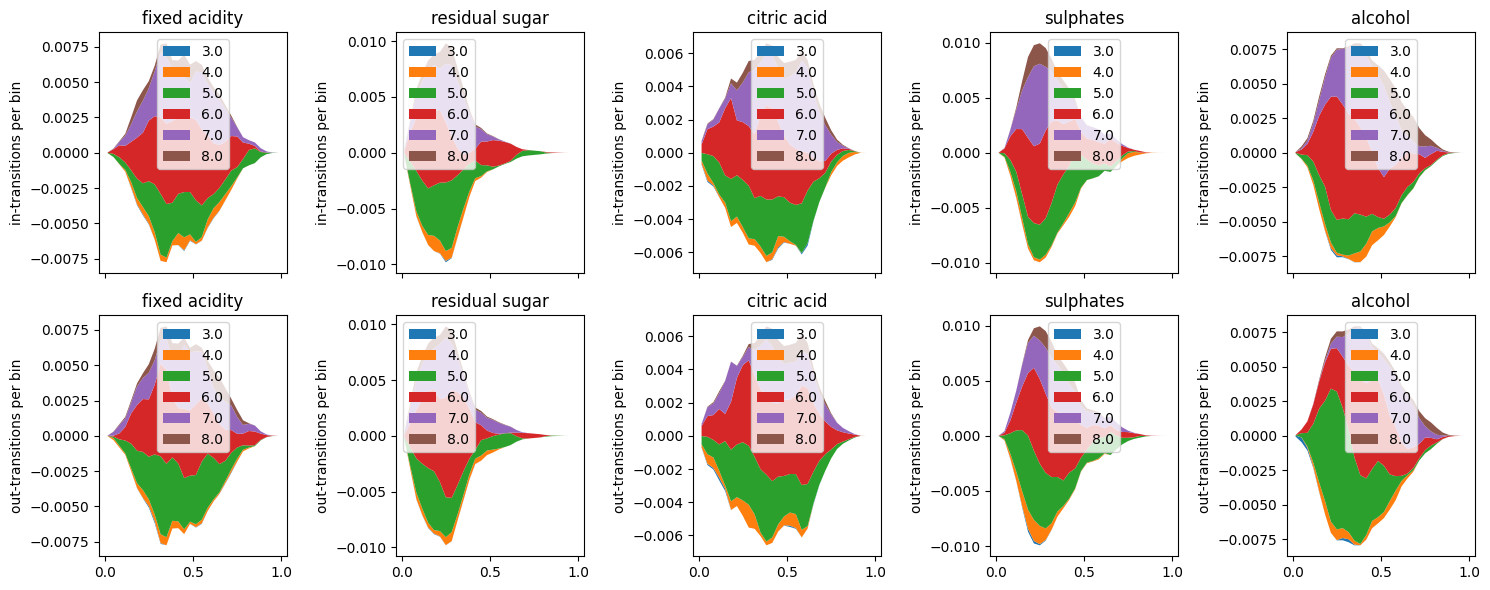

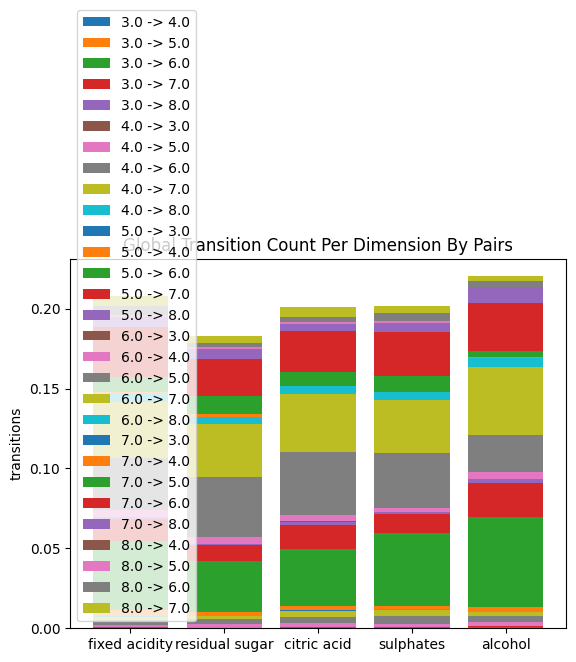

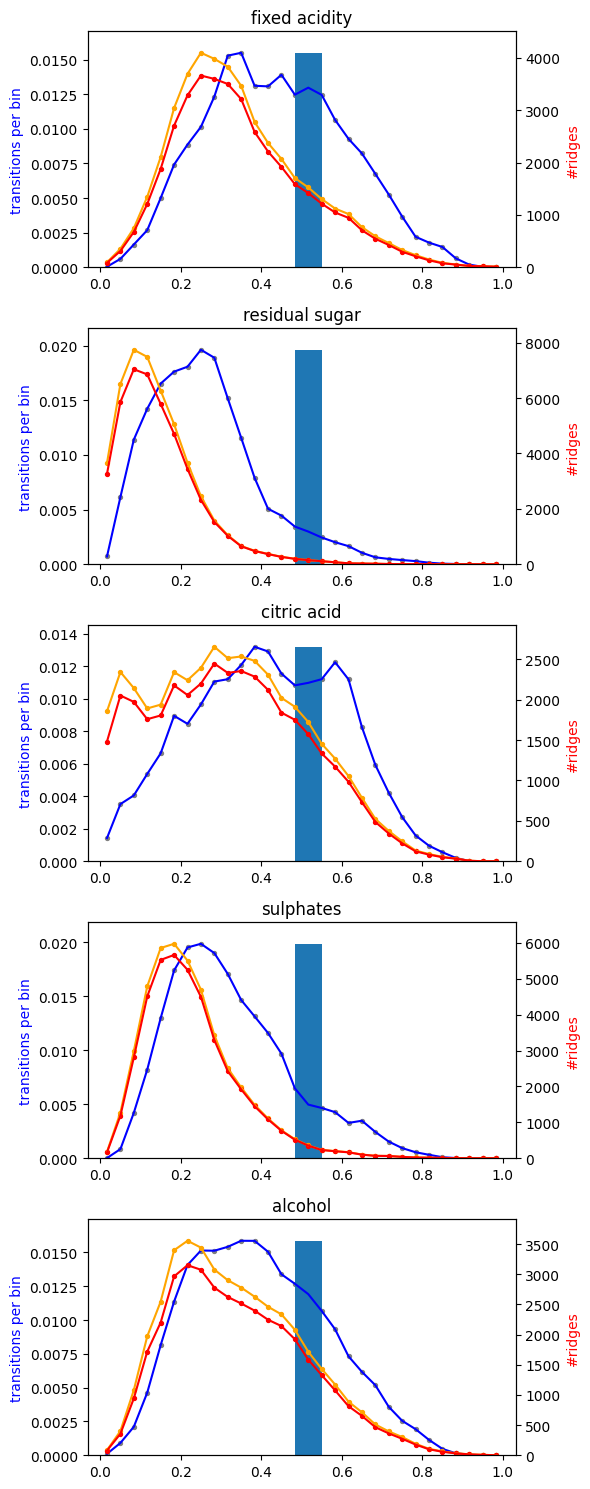

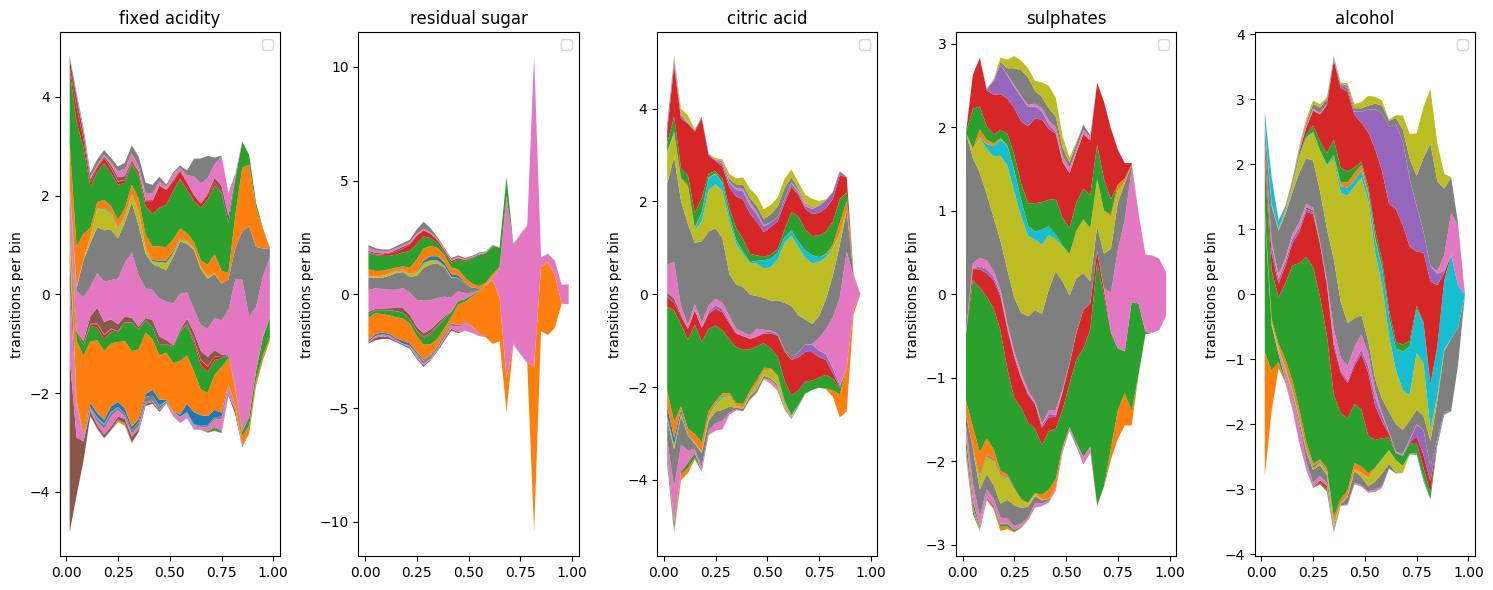

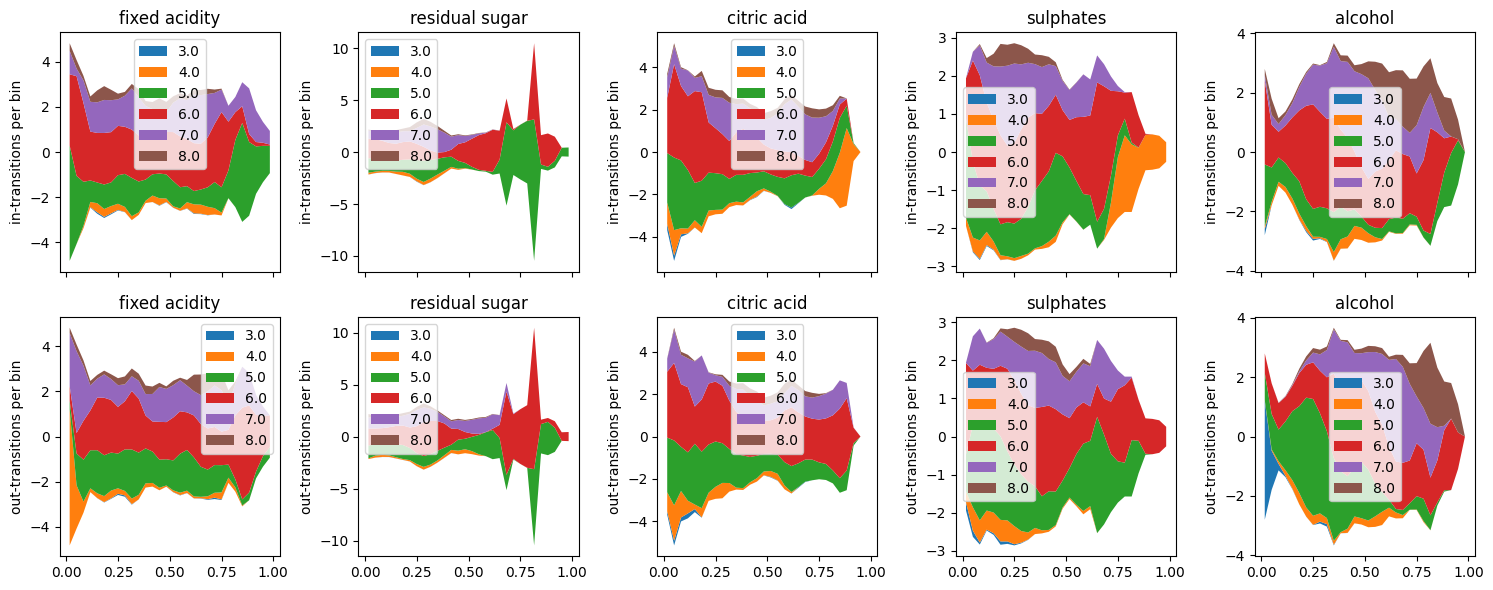

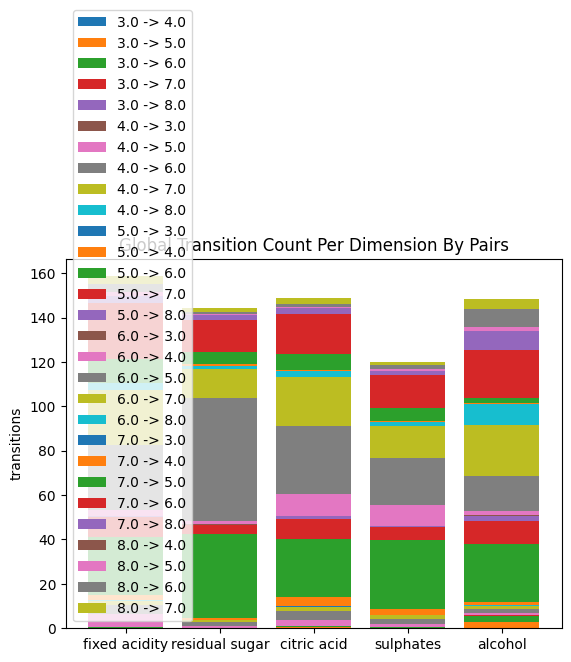

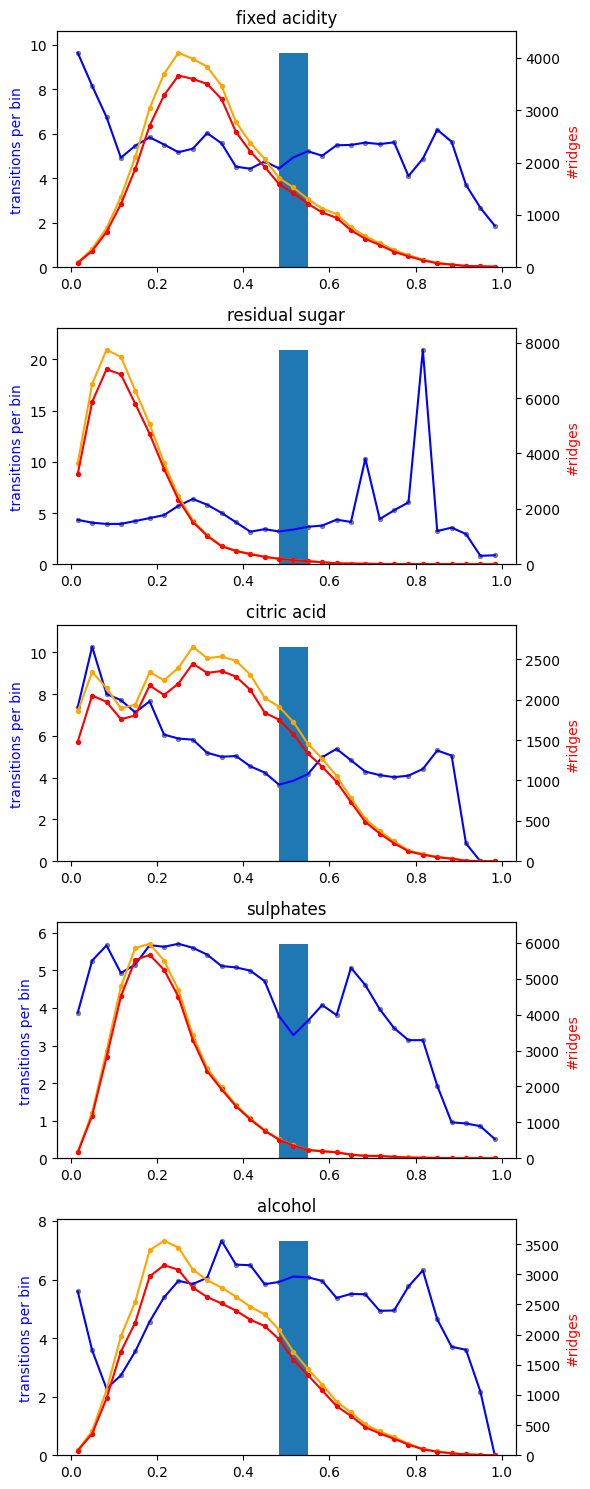

In [45]:
compute_and_plot_para_voro(df[["fixed acidity", "residual sugar", "citric acid", "sulphates", "alcohol", "quality"]], normalize_samples=True, n_samples_per_dim=30, clip_convex_hull=True)